## Imports and options

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)  # to see whole strigs in columns
pd.set_option('display.max_rows', None)  # to see all rows
pd.set_option('display.max_columns', None)  # to see all cols

## Data loading

In [2]:
col_desc = pd.read_csv('HomeCredit_columns_description.csv', encoding='cp1252')  # .csv file in cp1252 encoding insted of utf-8?
filtered_col_desc = col_desc[col_desc['Table'] == 'application_{train|test}.csv']  # leave rows related to application_{train|test}.csv
filtered_col_desc = filtered_col_desc.drop(filtered_col_desc.columns[0], axis=1)  # delete indexes col | axis=1 means dropping columns
filtered_col_desc = filtered_col_desc.drop(['Table'], axis=1)  # delete table name | axis=1 means dropping columns (not rows)
filtered_col_desc = filtered_col_desc.rename(columns={'Row': 'Column'})  # change column name to join on it later

In [3]:
train_data = pd.read_csv('application_train.csv')
test_data = pd.read_csv('application_test.csv')  # doesn't have target column

In [4]:
data = pd.concat([train_data, test_data], ignore_index=True)  # ignore_index to continue indexing from train_data end

In [5]:
data = data.drop(['SK_ID_CURR'], axis=1)  # don't need column id feature

## Data inspection

### Find distinctions between train and test

In [6]:
train_cols = pd.DataFrame({'Columns': train_data.columns, 'Train': '+'})
test_cols = pd.DataFrame({'Columns': test_data.columns, 'Test': '+'})

train_test_cols = pd.merge(train_cols, test_cols, on='Columns', how='outer')  # show matches and mismatches
train_test_cols

# we can see only mismatch is TARGET column, which is not in the test dataset

Columns Train Test
0                     AMT_ANNUITY     +    +
1                      AMT_CREDIT     +    +
2                 AMT_GOODS_PRICE     +    +
3                AMT_INCOME_TOTAL     +    +
4       AMT_REQ_CREDIT_BUREAU_DAY     +    +
5      AMT_REQ_CREDIT_BUREAU_HOUR     +    +
6       AMT_REQ_CREDIT_BUREAU_MON     +    +
7       AMT_REQ_CREDIT_BUREAU_QRT     +    +
8      AMT_REQ_CREDIT_BUREAU_WEEK     +    +
9      AMT_REQ_CREDIT_BUREAU_YEAR     +    +
10                 APARTMENTS_AVG     +    +
11                APARTMENTS_MEDI     +    +
12                APARTMENTS_MODE     +    +
13               BASEMENTAREA_AVG     +    +
14              BASEMENTAREA_MEDI     +    +
15              BASEMENTAREA_MODE     +    +
16                   CNT_CHILDREN     +    +
17                CNT_FAM_MEMBERS     +    +
18                    CODE_GENDER     +    +
19                 COMMONAREA_AVG     +    +
20                COMMONAREA_MEDI     +    +
21                COMMONAREA_MODE     +    +
22                     DAYS_BIRTH     +    +
23                  DAYS_EMPLOYED     +    +
24                DAYS_ID_PUBLISH     +    +
25         DAYS_LAST_PHONE_CHANGE     +    +
26              DAYS_REGISTRATION     +    +
27       DEF_30_CNT_SOCIAL_CIRCLE     +    +
28       DEF_60_CNT_SOCIAL_CIRCLE     +    +
29                  ELEVATORS_AVG     +    +
30                 ELEVATORS_MEDI     +    +
31                 ELEVATORS_MODE     +    +
32            EMERGENCYSTATE_MODE     +    +
33                  ENTRANCES_AVG     +    +
34                 ENTRANCES_MEDI     +    +
35                 ENTRANCES_MODE     +    +
36                   EXT_SOURCE_1     +    +
37                   EXT_SOURCE_2     +    +
38                   EXT_SOURCE_3     +    +
39               FLAG_CONT_MOBILE     +    +
40               FLAG_DOCUMENT_10     +    +
41               FLAG_DOCUMENT_11     +    +
42               FLAG_DOCUMENT_12     +    +
43               FLAG_DOCUMENT_13     +    +
44               FLAG_DOCUMENT_14     +    +
45               FLAG_DOCUMENT_15     +    +
46               FLAG_DOCUMENT_16     +    +
47               FLAG_DOCUMENT_17     +    +
48               FLAG_DOCUMENT_18     +    +
49               FLAG_DOCUMENT_19     +    +
50                FLAG_DOCUMENT_2     +    +
51               FLAG_DOCUMENT_20     +    +
52               FLAG_DOCUMENT_21     +    +
53                FLAG_DOCUMENT_3     +    +
54                FLAG_DOCUMENT_4     +    +
55                FLAG_DOCUMENT_5     +    +
56                FLAG_DOCUMENT_6     +    +
57                FLAG_DOCUMENT_7     +    +
58                FLAG_DOCUMENT_8     +    +
59                FLAG_DOCUMENT_9     +    +
60                     FLAG_EMAIL     +    +
61                 FLAG_EMP_PHONE     +    +
62                     FLAG_MOBIL     +    +
63                   FLAG_OWN_CAR     +    +
64                FLAG_OWN_REALTY     +    +
65                     FLAG_PHONE     +    +
66                FLAG_WORK_PHONE     +    +
67                  FLOORSMAX_AVG     +    +
68                 FLOORSMAX_MEDI     +    +
69                 FLOORSMAX_MODE     +    +
70                  FLOORSMIN_AVG     +    +
71                 FLOORSMIN_MEDI     +    +
72                 FLOORSMIN_MODE     +    +
73             FONDKAPREMONT_MODE     +    +
74        HOUR_APPR_PROCESS_START     +    +
75                 HOUSETYPE_MODE     +    +
76                   LANDAREA_AVG     +    +
77                  LANDAREA_MEDI     +    +
78                  LANDAREA_MODE     +    +
79        LIVE_CITY_NOT_WORK_CITY     +    +
80    LIVE_REGION_NOT_WORK_REGION     +    +
81           LIVINGAPARTMENTS_AVG     +    +
82          LIVINGAPARTMENTS_MEDI     +    +
83          LIVINGAPARTMENTS_MODE     +    +
84                 LIVINGAREA_AVG     +    +
85                LIVINGAREA_MEDI     +    +
86                LIVINGAREA_MODE     +    +
87             NAME_CONTRACT_TYPE     +    +
88            NAME_ED

In [7]:
# data.head()  # some first rows
data.sample(5)  # some random rows
# data.tail()  # some last rows

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
132332     0.0         Cash loans           F            N               Y   
17226      0.0         Cash loans           F            N               N   
111838     0.0         Cash loans           F            N               Y   
131075     0.0         Cash loans           F            N               N   
154147     0.0         Cash loans           F            N               Y   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
132332             0          112500.0    178290.0      10084.5   
17226              0          675000.0   1638000.0      45045.0   
111838             0          144000.0    900000.0      38133.0   
131075             0          112500.0    450000.0      22018.5   
154147             0           81000.0    257391.0      18040.5   

        AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
132332         157500.0   Unaccompanied               Working   
17226         1638000.0   Unaccompanied  Commercial associate   
111838         900000.0   Unaccompanied             Pensioner   
131075         450000.0   Unaccompanied               Working   
154147         238500.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
132332  Secondary / secondary special          Separated  Municipal apartment   
17226                Higher education            Married    House / apartment   
111838  Secondary / secondary special            Married    House / apartment   
131075  Secondary / secondary special            Married    House / apartment   
154147               Higher education            Married    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
132332                    0.006671      -16383          -1808   
17226                     0.006008      -18606          -1082   
111838                    0.019689      -21792         365243   
131075                    0.026392      -18698         -11392   
154147                    0.025164      -14936          -6930   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
132332           -10527.0            -4040          NaN           1   
17226             -6594.0            -2152          NaN           1   
111838           -13329.0            -4634          NaN           1   
131075            -5787.0            -2208          NaN           1   
154147            -4644.0            -4644          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
132332               1                0                 1           0   
17226                1                1                 1           0   
111838               0                0                 1           0   
131075               1                1                 1           1   
154147               1                0                 1           0   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
132332           0             NaN              1.0                     2   
17226            1     Accountants              2.0                     2   
111838           0             NaN              2.0                     2   
131075           0        Managers              2.0                     2   
154147           0      Core staff              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
132332                            2                   THURSDAY   
17226                             2                  WEDNESDAY   
111838                            2                     FRIDAY   
131075                            2                    TUESDAY   
154147                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
132332                       11                           0   
17226          

In [8]:
# dsiplay datatypes / descriptions
columns_datatypes = pd.DataFrame({
    'Dtype': data.dtypes.values,
    'Column': data.columns,
})  # create a dataframe with column names and dtypes

columns_datatypes_descriptions = pd.merge(columns_datatypes, filtered_col_desc, on='Column', how='left')  # join with descriptions

columns_datatypes_descriptions

Dtype                        Column  \
0    float64                        TARGET   
1     object            NAME_CONTRACT_TYPE   
2     object                   CODE_GENDER   
3     object                  FLAG_OWN_CAR   
4     object               FLAG_OWN_REALTY   
5      int64                  CNT_CHILDREN   
6    float64              AMT_INCOME_TOTAL   
7    float64                    AMT_CREDIT   
8    float64                   AMT_ANNUITY   
9    float64               AMT_GOODS_PRICE   
10    object               NAME_TYPE_SUITE   
11    object              NAME_INCOME_TYPE   
12    object           NAME_EDUCATION_TYPE   
13    object            NAME_FAMILY_STATUS   
14    object             NAME_HOUSING_TYPE   
15   float64    REGION_POPULATION_RELATIVE   
16     int64                    DAYS_BIRTH   
17     int64                 DAYS_EMPLOYED   
18   float64             DAYS_REGISTRATION   
19     int64               DAYS_ID_PUBLISH   
20   float64                   OWN_CAR_AGE   
21     int64                    FLAG_MOBIL   
22     int64                FLAG_EMP_PHONE   
23     int64               FLAG_WORK_PHONE   
24     int64              FLAG_CONT_MOBILE   
25     int64                    FLAG_PHONE   
26     int64                    FLAG_EMAIL   
27    object               OCCUPATION_TYPE   
28   float64               CNT_FAM_MEMBERS   
29     int64          REGION_RATING_CLIENT   
30     int64   REGION_RATING_CLIENT_W_CITY   
31    object    WEEKDAY_APPR_PROCESS_START   
32     int64       HOUR_APPR_PROCESS_START   
33     int64    REG_REGION_NOT_LIVE_REGION   
34     int64    REG_REGION_NOT_WORK_REGION   
35     int64   LIVE_REGION_NOT_WORK_REGION   
36     int64        REG_CITY_NOT_LIVE_CITY   
37     int64        REG_CITY_NOT_WORK_CITY   
38     int64       LIVE_CITY_NOT_WORK_CITY   
39    object             ORGANIZATION_TYPE   
40   float64                  EXT_SOURCE_1   
41   float64                  EXT_SOURCE_2   
42   float64                  EXT_SOURCE_3   
43   float64                APARTMENTS_AVG   
44   float64              BASEMENTAREA_AVG   
45   float64   YEARS_BEGINEXPLUATATION_AVG   
46   float64               YEARS_BUILD_AVG   
47   float64                COMMONAREA_AVG   
48   float64                 ELEVATORS_AVG   
49   float64                 ENTRANCES_AVG   
50   float64                 FLOORSMAX_AVG   
51   float64                 FLOORSMIN_AVG   
52   float64                  LANDAREA_AVG   
53   float64          LIVINGAPARTMENTS_AVG   
54   float64                LIVINGAREA_AVG   
55   float64       NONLIVINGAPARTMENTS_AVG   
56   float64             NONLIVINGAREA_AVG   
57   float64               APARTMENTS_MODE   
58   float64             BASEMENTAREA_MODE   
59   float64  YEARS_BEGINEXPLUATATION_MODE   
60   float64              YEARS_BUILD_MODE   
61   float64               COMMONAREA_MODE   
62   float64                ELEVATORS_MODE   
63   float64                ENTRANCES_MODE   
64   float64                FLOORSMAX_MODE   
65   float64                FLOORSMIN_MODE   
66   float64                 LANDAREA_MODE   
67   float64         LIVINGAPARTMENTS_MODE   
68   float64               LIVINGAREA_MODE   
69   float64      NONLIVINGAPARTMENTS_MODE   
70   float64            NONLIVINGAREA_MODE   
71   float64               APARTMENTS_MEDI   
72   float64             BASEMENTAREA_MEDI   
73   float64  YEARS_BEGINEXPLUATATION_MEDI   
74   float64              YEARS_BUILD_MEDI   
75   float64               COMMONAREA_MEDI   
76   float64                ELEVATORS_MEDI   
77   float64                ENTRANCES_MEDI   
78   float64                FLOORSMAX_MEDI   
79   float64                FLOORSMIN_MEDI   
80   float64                 LANDAREA_MEDI   
81   float64         LIVINGAPARTMENTS_MEDI   
82   float64               LIVINGAREA_MEDI   
83   float64      NONLIVINGAPARTMENTS_MEDI   
84   float64            NONLIVINGAREA_MEDI   
85    object            FONDKAPREMONT_MODE   
86   

In [9]:
# so all this data about whether person had payment difficulties or paid on time (taking into consideration some parameters)

In [10]:
# summary statistic - distribution
data.describe(include='all')

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
count   307511.000000             356255      356255       356255   
unique            NaN                  2           3            2   
top               NaN         Cash loans           F            N   
freq              NaN             326537      235126       235235   
mean         0.080729                NaN         NaN          NaN   
std          0.272419                NaN         NaN          NaN   
min          0.000000                NaN         NaN          NaN   
25%          0.000000                NaN         NaN          NaN   
50%          0.000000                NaN         NaN          NaN   
75%          0.000000                NaN         NaN          NaN   
max          1.000000                NaN         NaN          NaN   

       FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count           356255  356255.000000      3.562550e+05  3.562550e+05   
unique               2            NaN               NaN           NaN   
top                  Y            NaN               NaN           NaN   
freq            246970            NaN               NaN           NaN   
mean               NaN       0.414316      1.701161e+05  5.877674e+05   
std                NaN       0.720378      2.235068e+05  3.986237e+05   
min                NaN       0.000000      2.565000e+04  4.500000e+04   
25%                NaN       0.000000      1.125000e+05  2.700000e+05   
50%                NaN       0.000000      1.530000e+05  5.002110e+05   
75%                NaN       1.000000      2.025000e+05  7.975575e+05   
max                NaN      20.000000      1.170000e+08  4.050000e+06   

          AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
count   356219.000000     3.559770e+05          354052           356255   
unique            NaN              NaN               7                8   
top               NaN              NaN   Unaccompanied          Working   
freq              NaN              NaN          288253           183307   
mean     27425.560657     5.280200e+05             NaN              NaN   
std      14732.808190     3.660650e+05             NaN              NaN   
min       1615.500000     4.050000e+04             NaN              NaN   
25%      16731.000000     2.340000e+05             NaN              NaN   
50%      25078.500000     4.500000e+05             NaN              NaN   
75%      34960.500000     6.750000e+05             NaN              NaN   
max     258025.500000     4.050000e+06             NaN              NaN   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
count                          356255             356255             356255   
unique                              5                  6                  6   
top     Secondary / secondary special            Married  House / apartment   
freq                           252379             228715             316513   
mean                              NaN                NaN                NaN   
std                               NaN                NaN                NaN   
min                               NaN                NaN                NaN   
25%                               NaN                NaN                NaN   
50%                               NaN                NaN                NaN   
75%                               NaN                NaN                NaN   
max                               NaN                NaN                NaN   

        REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count                356255.000000  356255.000000  356255.000000   
unique                         NaN            NaN            NaN   
top                            NaN            NaN            NaN   
freq                           NaN            NaN            NaN   
mean                      0.020917  -16041.248841   64317.231413   
std                       0.013915    4358.803980  

In [11]:
# get info
# data.info()
print(f'Rows: {data.shape[0]} | Columns: {data.shape[1]}')

Rows: 356255 | Columns: 121


## Cleaning data

### Automatically cleaning NaN 

In [12]:
# check how many cells are empty
data.isnull().sum()  # count all NaN values

# isnull() returns a DataFrame of the same shape as data, where each element is
# True if the value is NaN (null)
# False otherwise

# sum() when used on a boolean DataFrame, True is treated as 1, and False as 0

TARGET                           48744
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         36
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   2203
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     235241
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [13]:
# we can see that data has many NaN (empty) values

In [14]:
# lets delete all columns where over 80% of all values are NaN

cols_to_drop = []

for column in data.columns:
    num_nan = data[column].isna().sum()
    num_cells = data.shape[0]

    if num_nan / num_cells > 0.8 and column != 'TARGET':
        cols_to_drop.append(column)


data = data.drop(cols_to_drop, axis=1)

print(f'Columns dropped: {cols_to_drop}.')
print(f'Dropped total: {len(cols_to_drop)} columns.')

Columns dropped: [].
Dropped total: 0 columns.


In [15]:
# lets delete all rows where over 60% of all values are NaN

# rows_to_drop = []

# for index, row in data.iterrows():
#     num_nan = row.isna().sum()
#     num_cells = data.shape[1]
    
#     if num_nan / num_cells > 0.6 and not row['TARGET'].isna():  # check we are not deleting rows from test dataset
#         rows_to_drop.append(index)

# data = data.drop(rows_to_drop, axis=0)

# print(f'Rows dropped: {rows_to_drop}.')
# print(f'Dropped total: {len(rows_to_drop)} rows.')

# doesn't drop rows in 60% NaN but takes a few minutes

# Output:
# Rows dropped: [].
# Dropped total: 0 rows.

In [16]:
# lets delete all columns where same value repeates in over 90% of cells

cols_to_drop_n_common_value = {}

for column in data.columns:
    total = data[column].count()  # num of values (int) | count() excludes NaN
    counts = data[column].value_counts()  # not counting NaN (series)
    normalized = counts / total  # divide all counters of values by total number of values | get percentage
    
    if (normalized > 0.9).any() and column != 'TARGET':  # check if any of normalized counts exceeds given value
        most_common_value = counts.idxmax()
        cols_to_drop_n_common_value[column] = (most_common_value)


data = data.drop(list(cols_to_drop_n_common_value.keys()), axis=1)

# print dropped columns and their most frequent values
for column, value in cols_to_drop_n_common_value.items():
    print(f'{column} - {value}')

print(f'Total columns dropped: {len(cols_to_drop_n_common_value)}.')

NAME_CONTRACT_TYPE - Cash loans
FLAG_MOBIL - 1
FLAG_CONT_MOBILE - 1
FLAG_EMAIL - 0
REG_REGION_NOT_LIVE_REGION - 0
REG_REGION_NOT_WORK_REGION - 0
LIVE_REGION_NOT_WORK_REGION - 0
REG_CITY_NOT_LIVE_CITY - 0
HOUSETYPE_MODE - block of flats
EMERGENCYSTATE_MODE - No
DEF_60_CNT_SOCIAL_CIRCLE - 0.0
FLAG_DOCUMENT_2 - 0
FLAG_DOCUMENT_4 - 0
FLAG_DOCUMENT_5 - 0
FLAG_DOCUMENT_6 - 0
FLAG_DOCUMENT_7 - 0
FLAG_DOCUMENT_8 - 0
FLAG_DOCUMENT_9 - 0
FLAG_DOCUMENT_10 - 0
FLAG_DOCUMENT_11 - 0
FLAG_DOCUMENT_12 - 0
FLAG_DOCUMENT_13 - 0
FLAG_DOCUMENT_14 - 0
FLAG_DOCUMENT_15 - 0
FLAG_DOCUMENT_16 - 0
FLAG_DOCUMENT_17 - 0
FLAG_DOCUMENT_18 - 0
FLAG_DOCUMENT_19 - 0
FLAG_DOCUMENT_20 - 0
FLAG_DOCUMENT_21 - 0
AMT_REQ_CREDIT_BUREAU_HOUR - 0.0
AMT_REQ_CREDIT_BUREAU_DAY - 0.0
AMT_REQ_CREDIT_BUREAU_WEEK - 0.0
Total columns dropped: 33.


In [17]:
# check whats left after cleaning
print(f'Rows: {data.shape[0]} | Columns: {data.shape[1]}')
print(list(data.columns))

Rows: 356255 | Columns: 88
['TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APA

### Clearing manually

In [18]:
# dsiplay datatypes / descriptions - again - to drop columns manualy
columns_datatypes = pd.DataFrame({
    'Dtype': data.dtypes.values,
    'Column': data.columns,
})  # create a dataframe with column names and dtypes

columns_datatypes_descriptions = pd.merge(columns_datatypes, filtered_col_desc, on='Column', how='left')  # join with descriptions

columns_datatypes_descriptions

Dtype                        Column  \
0   float64                        TARGET   
1    object                   CODE_GENDER   
2    object                  FLAG_OWN_CAR   
3    object               FLAG_OWN_REALTY   
4     int64                  CNT_CHILDREN   
5   float64              AMT_INCOME_TOTAL   
6   float64                    AMT_CREDIT   
7   float64                   AMT_ANNUITY   
8   float64               AMT_GOODS_PRICE   
9    object               NAME_TYPE_SUITE   
10   object              NAME_INCOME_TYPE   
11   object           NAME_EDUCATION_TYPE   
12   object            NAME_FAMILY_STATUS   
13   object             NAME_HOUSING_TYPE   
14  float64    REGION_POPULATION_RELATIVE   
15    int64                    DAYS_BIRTH   
16    int64                 DAYS_EMPLOYED   
17  float64             DAYS_REGISTRATION   
18    int64               DAYS_ID_PUBLISH   
19  float64                   OWN_CAR_AGE   
20    int64                FLAG_EMP_PHONE   
21    int64               FLAG_WORK_PHONE   
22    int64                    FLAG_PHONE   
23   object               OCCUPATION_TYPE   
24  float64               CNT_FAM_MEMBERS   
25    int64          REGION_RATING_CLIENT   
26    int64   REGION_RATING_CLIENT_W_CITY   
27   object    WEEKDAY_APPR_PROCESS_START   
28    int64       HOUR_APPR_PROCESS_START   
29    int64        REG_CITY_NOT_WORK_CITY   
30    int64       LIVE_CITY_NOT_WORK_CITY   
31   object             ORGANIZATION_TYPE   
32  float64                  EXT_SOURCE_1   
33  float64                  EXT_SOURCE_2   
34  float64                  EXT_SOURCE_3   
35  float64                APARTMENTS_AVG   
36  float64              BASEMENTAREA_AVG   
37  float64   YEARS_BEGINEXPLUATATION_AVG   
38  float64               YEARS_BUILD_AVG   
39  float64                COMMONAREA_AVG   
40  float64                 ELEVATORS_AVG   
41  float64                 ENTRANCES_AVG   
42  float64                 FLOORSMAX_AVG   
43  float64                 FLOORSMIN_AVG   
44  float64                  LANDAREA_AVG   
45  float64          LIVINGAPARTMENTS_AVG   
46  float64                LIVINGAREA_AVG   
47  float64       NONLIVINGAPARTMENTS_AVG   
48  float64             NONLIVINGAREA_AVG   
49  float64               APARTMENTS_MODE   
50  float64             BASEMENTAREA_MODE   
51  float64  YEARS_BEGINEXPLUATATION_MODE   
52  float64              YEARS_BUILD_MODE   
53  float64               COMMONAREA_MODE   
54  float64                ELEVATORS_MODE   
55  float64                ENTRANCES_MODE   
56  float64                FLOORSMAX_MODE   
57  float64                FLOORSMIN_MODE   
58  float64                 LANDAREA_MODE   
59  float64         LIVINGAPARTMENTS_MODE   
60  float64               LIVINGAREA_MODE   
61  float64      NONLIVINGAPARTMENTS_MODE   
62  float64            NONLIVINGAREA_MODE   
63  float64               APARTMENTS_MEDI   
64  float64             BASEMENTAREA_MEDI   
65  float64  YEARS_BEGINEXPLUATATION_MEDI   
66  float64              YEARS_BUILD_MEDI   
67  float64               COMMONAREA_MEDI   
68  float64                ELEVATORS_MEDI   
69  float64                ENTRANCES_MEDI   
70  float64                FLOORSMAX_MEDI   
71  float64                FLOORSMIN_MEDI   
72  float64                 LANDAREA_MEDI   
73  float64         LIVINGAPARTMENTS_MEDI   
74  float64               LIVINGAREA_MEDI   
75  float64      NONLIVINGAPARTMENTS_MEDI   
76  float64            NONLIVINGAREA_MEDI   
77   object            FONDKAPREMONT_MODE   
78  float64                TOTALAREA_MODE   
79   object            WALLSMATERIAL_MODE   
80  float64      OBS_30_CNT_SOCIAL_CIRCLE   
81  float64      DEF_30_CNT_SOCIAL_CIRCLE   
82  float64      OBS_60_CNT_SOCIAL_CIRCLE   
83  float64        DAYS_LAST_PHONE_CHANGE   
84    int64               FLAG_DOCUMENT_3   
85  float64     AMT_REQ_CREDIT_BUREAU_MON   
86  float64     AMT_REQ_CREDIT_BUREAU_QRT   
87  float64    AMT_REQ_CREDIT_BUREAU_YEAR   



In [19]:
# summary statistic - distribution - again - to drop columns manualy
data.describe(include='all')

TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  \
count   307511.000000      356255       356255          356255  356255.000000   
unique            NaN           3            2               2            NaN   
top               NaN           F            N               Y            NaN   
freq              NaN      235126       235235          246970            NaN   
mean         0.080729         NaN          NaN             NaN       0.414316   
std          0.272419         NaN          NaN             NaN       0.720378   
min          0.000000         NaN          NaN             NaN       0.000000   
25%          0.000000         NaN          NaN             NaN       0.000000   
50%          0.000000         NaN          NaN             NaN       0.000000   
75%          0.000000         NaN          NaN             NaN       1.000000   
max          1.000000         NaN          NaN             NaN      20.000000   

        AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count       3.562550e+05  3.562550e+05  356219.000000     3.559770e+05   
unique               NaN           NaN            NaN              NaN   
top                  NaN           NaN            NaN              NaN   
freq                 NaN           NaN            NaN              NaN   
mean        1.701161e+05  5.877674e+05   27425.560657     5.280200e+05   
std         2.235068e+05  3.986237e+05   14732.808190     3.660650e+05   
min         2.565000e+04  4.500000e+04    1615.500000     4.050000e+04   
25%         1.125000e+05  2.700000e+05   16731.000000     2.340000e+05   
50%         1.530000e+05  5.002110e+05   25078.500000     4.500000e+05   
75%         2.025000e+05  7.975575e+05   34960.500000     6.750000e+05   
max         1.170000e+08  4.050000e+06  258025.500000     4.050000e+06   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           354052           356255                         356255   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            288253           183307                         252379   
mean               NaN              NaN                            NaN   
std                NaN              NaN                            NaN   
min                NaN              NaN                            NaN   
25%                NaN              NaN                            NaN   
50%                NaN              NaN                            NaN   
75%                NaN              NaN                            NaN   
max                NaN              NaN                            NaN   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
count              356255             356255               356255.000000   
unique                  6                  6                         NaN   
top               Married  House / apartment                         NaN   
freq               228715             316513                         NaN   
mean                  NaN                NaN                    0.020917   
std                   NaN                NaN                    0.013915   
min                   NaN                NaN                    0.000253   
25%                   NaN                NaN                    0.010006   
50%                   NaN                NaN                    0.018850   
75%                   NaN                NaN                    0.028663   
max                   NaN                NaN                    0.072508   

           DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count   356255.000000  356255.000000      356255.000000    356255.000000   
unique            NaN            NaN                NaN              NaN   
top               NaN            NaN                NaN              NaN   
freq              NaN            NaN           

In [20]:
# delete columns that might not help us further
data = data.drop(
        [   # 'TARGET',
            # 'CODE_GENDER',
            # 'FLAG_OWN_CAR',
            # 'FLAG_OWN_REALTY',
            # 'CNT_CHILDREN',
            # 'AMT_INCOME_TOTAL',
            # 'AMT_CREDIT',
            # 'AMT_ANNUITY',
            # 'AMT_GOODS_PRICE',
            # 'NAME_TYPE_SUITE',
            # 'NAME_INCOME_TYPE',
            # 'NAME_EDUCATION_TYPE',
            # 'NAME_FAMILY_STATUS',
            # 'NAME_HOUSING_TYPE',
            # 'REGION_POPULATION_RELATIVE',
            # 'DAYS_BIRTH',
            # 'DAYS_EMPLOYED',
            # 'DAYS_REGISTRATION',
            # 'DAYS_ID_PUBLISH',
            # 'OWN_CAR_AGE',
            # 'FLAG_EMP_PHONE',
            # 'FLAG_WORK_PHONE',
            # 'FLAG_PHONE',
            # 'OCCUPATION_TYPE',
            # 'CNT_FAM_MEMBERS',
            # 'REGION_RATING_CLIENT',
            # 'REGION_RATING_CLIENT_W_CITY',
            # 'WEEKDAY_APPR_PROCESS_START',
            # 'HOUR_APPR_PROCESS_START',
            # 'REG_CITY_NOT_WORK_CITY',
            # 'LIVE_CITY_NOT_WORK_CITY',
            # 'ORGANIZATION_TYPE',
            # 'EXT_SOURCE_1',
            # 'EXT_SOURCE_2',
            # 'EXT_SOURCE_3',
            
            'APARTMENTS_AVG',
            'BASEMENTAREA_AVG',
            'YEARS_BEGINEXPLUATATION_AVG',
            'YEARS_BUILD_AVG',
            'COMMONAREA_AVG',
            'ELEVATORS_AVG',
            'ENTRANCES_AVG',
            'FLOORSMAX_AVG',
            'FLOORSMIN_AVG',
            'LANDAREA_AVG',
            'LIVINGAPARTMENTS_AVG',
            'LIVINGAREA_AVG',
            'NONLIVINGAPARTMENTS_AVG',
            'NONLIVINGAREA_AVG',
            
            'APARTMENTS_MODE',
            'BASEMENTAREA_MODE',
            'YEARS_BEGINEXPLUATATION_MODE',
            'YEARS_BUILD_MODE',
            'COMMONAREA_MODE',
            'ELEVATORS_MODE',
            'ENTRANCES_MODE',
            'FLOORSMAX_MODE',
            'FLOORSMIN_MODE',
            'LANDAREA_MODE',
            'LIVINGAPARTMENTS_MODE',
            'LIVINGAREA_MODE',
            'NONLIVINGAPARTMENTS_MODE',
            'NONLIVINGAREA_MODE',
            
            # 'APARTMENTS_MEDI',
            # 'BASEMENTAREA_MEDI',
            # 'YEARS_BEGINEXPLUATATION_MEDI',
            # 'YEARS_BUILD_MEDI',
            # 'COMMONAREA_MEDI',
            # 'ELEVATORS_MEDI',
            # 'ENTRANCES_MEDI',
            # 'FLOORSMAX_MEDI',
            # 'FLOORSMIN_MEDI',
            # 'LANDAREA_MEDI',
            # 'LIVINGAPARTMENTS_MEDI',
            # 'LIVINGAREA_MEDI',
            # 'NONLIVINGAPARTMENTS_MEDI',
            # 'NONLIVINGAREA_MEDI',
            
            # 'FONDKAPREMONT_MODE',
            # 'TOTALAREA_MODE',
            # 'WALLSMATERIAL_MODE',
            # 'OBS_30_CNT_SOCIAL_CIRCLE',
            # 'DEF_30_CNT_SOCIAL_CIRCLE',
            # 'OBS_60_CNT_SOCIAL_CIRCLE',
            # 'DAYS_LAST_PHONE_CHANGE',
            # 'FLAG_DOCUMENT_3',
            # 'AMT_REQ_CREDIT_BUREAU_MON',
            # 'AMT_REQ_CREDIT_BUREAU_QRT',
            # 'AMT_REQ_CREDIT_BUREAU_YEAR'
        ],
        axis=1         
    )

In [21]:
# check whats left after manual cleaning
print(f'Rows: {data.shape[0]} | Columns: {data.shape[1]}')

Rows: 356255 | Columns: 60


In [22]:
# got 53 columns from inititial 122

### Duplicates

In [23]:
data[data.duplicated()]  

# data.duplicated() returns a boolean Series indicating whether each row is a duplicate of a previous row
# [...] apply retrieved boolean mask on data

Empty DataFrame
Columns: [TARGET, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_PHONE, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_3, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

In [24]:
# we can see that there is no duplicates

In [25]:
# function to get unique values from each column
def get_unique_values(series, max_values=20, sample_size=10):
    unique_vals = series.dropna().unique()
    total_unique = len(unique_vals)

    if total_unique > max_values:
        sample_vals = pd.Series(unique_vals).sample(n=sample_size, random_state=1).tolist()
        remaining = total_unique - sample_size
        return sample_vals + [f'... {remaining} more']
    
    return list(unique_vals)

# dsiplay datatypes / descriptions - again - to show what left
columns_datatypes = pd.DataFrame({
    'Dtype': data.dtypes.values,
    'Column': data.columns,
})  # create a dataframe with column names and dtypes

# get unique values for each column
columns_datatypes['Unique Values'] = data.apply(get_unique_values).values

columns_datatypes_descriptions = pd.merge(columns_datatypes, filtered_col_desc, on='Column', how='left')  # join with descriptions

columns_datatypes_descriptions

Dtype                        Column  \
0   float64                        TARGET   
1    object                   CODE_GENDER   
2    object                  FLAG_OWN_CAR   
3    object               FLAG_OWN_REALTY   
4     int64                  CNT_CHILDREN   
5   float64              AMT_INCOME_TOTAL   
6   float64                    AMT_CREDIT   
7   float64                   AMT_ANNUITY   
8   float64               AMT_GOODS_PRICE   
9    object               NAME_TYPE_SUITE   
10   object              NAME_INCOME_TYPE   
11   object           NAME_EDUCATION_TYPE   
12   object            NAME_FAMILY_STATUS   
13   object             NAME_HOUSING_TYPE   
14  float64    REGION_POPULATION_RELATIVE   
15    int64                    DAYS_BIRTH   
16    int64                 DAYS_EMPLOYED   
17  float64             DAYS_REGISTRATION   
18    int64               DAYS_ID_PUBLISH   
19  float64                   OWN_CAR_AGE   
20    int64                FLAG_EMP_PHONE   
21    int64               FLAG_WORK_PHONE   
22    int64                    FLAG_PHONE   
23   object               OCCUPATION_TYPE   
24  float64               CNT_FAM_MEMBERS   
25    int64          REGION_RATING_CLIENT   
26    int64   REGION_RATING_CLIENT_W_CITY   
27   object    WEEKDAY_APPR_PROCESS_START   
28    int64       HOUR_APPR_PROCESS_START   
29    int64        REG_CITY_NOT_WORK_CITY   
30    int64       LIVE_CITY_NOT_WORK_CITY   
31   object             ORGANIZATION_TYPE   
32  float64                  EXT_SOURCE_1   
33  float64                  EXT_SOURCE_2   
34  float64                  EXT_SOURCE_3   
35  float64               APARTMENTS_MEDI   
36  float64             BASEMENTAREA_MEDI   
37  float64  YEARS_BEGINEXPLUATATION_MEDI   
38  float64              YEARS_BUILD_MEDI   
39  float64               COMMONAREA_MEDI   
40  float64                ELEVATORS_MEDI   
41  float64                ENTRANCES_MEDI   
42  float64                FLOORSMAX_MEDI   
43  float64                FLOORSMIN_MEDI   
44  float64                 LANDAREA_MEDI   
45  float64         LIVINGAPARTMENTS_MEDI   
46  float64               LIVINGAREA_MEDI   
47  float64      NONLIVINGAPARTMENTS_MEDI   
48  float64            NONLIVINGAREA_MEDI   
49   object            FONDKAPREMONT_MODE   
50  float64                TOTALAREA_MODE   
51   object            WALLSMATERIAL_MODE   
52  float64      OBS_30_CNT_SOCIAL_CIRCLE   
53  float64      DEF_30_CNT_SOCIAL_CIRCLE   
54  float64      OBS_60_CNT_SOCIAL_CIRCLE   
55  float64        DAYS_LAST_PHONE_CHANGE   
56    int64               FLAG_DOCUMENT_3   
57  float64     AMT_REQ_CREDIT_BUREAU_MON   
58  float64     AMT_REQ_CREDIT_BUREAU_QRT   
59  float64    AMT_REQ_CREDIT_BUREAU_YEAR   

                                                                                                                                                                                                                                                                 Unique Values  \
0                                                                                                                                                                                                                                                                   [1.0, 0.0]   
1                                                                                                                                                                                                                                                                  [M, F, XNA]   
2                                                                                                                                                                                                                                                                       [N, Y]   
3                                                                                                                                                                   

## Data Transform

### Split categorial features

#### One-Hot encoding as data cant be ordered

In [26]:
data = pd.get_dummies(data, columns=['CODE_GENDER'], prefix='GENDER')
# Make columns
# GENDER_F    - 0/1
# GENDER_M    - 0/1
# GENDER_XNA  - 0/1

# out of column 
# CODE_GENDER - M/F/XNA

# might be useful to drop one category to avoid multicollinearity
# this will give:
# GENDER_M
# GENDER_XNA
# because GENDER_F is implicitly represented when both of these are 0. - Avoid Multicollinearity

# NaNs become 0

# same
data = pd.get_dummies(data, columns=['NAME_TYPE_SUITE'], prefix='NAME_TYPE_SUITE')
data = pd.get_dummies(data, columns=['NAME_INCOME_TYPE'], prefix='NAME_INCOME_TYPE')
data = pd.get_dummies(data, columns=['NAME_EDUCATION_TYPE'], prefix='NAME_EDUCATION_TYPE')
data = pd.get_dummies(data, columns=['NAME_FAMILY_STATUS'], prefix='NAME_FAMILY_STATUS')
data = pd.get_dummies(data, columns=['NAME_HOUSING_TYPE'], prefix='NAME_HOUSING_TYPE')
data = pd.get_dummies(data, columns=['OCCUPATION_TYPE'], prefix='OCCUPATION_TYPE')
data = pd.get_dummies(data, columns=['ORGANIZATION_TYPE'], prefix='ORGANIZATION_TYPE')
data = pd.get_dummies(data, columns=['WALLSMATERIAL_MODE'], prefix='WALLSMATERIAL_MODE')
data = pd.get_dummies(data, columns=['FONDKAPREMONT_MODE'], prefix='FONDKAPREMONT_MODE')


#### Label encoding for ordered data

In [27]:
data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].map({'N': 0, 'Y': 1})
data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].map({'N': 0, 'Y': 1})
data['WEEKDAY_APPR_PROCESS_START'] = data['WEEKDAY_APPR_PROCESS_START'].map({'MONDAY': 0, 'TUESDAY': 1, 'WEDNESDAY': 2, 'THURSDAY': 3, 'FRIDAY': 4, 'SATURDAY': 5, 'SUNDAY': 6})

# set -1 for NaN values
changed_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'WEEKDAY_APPR_PROCESS_START']
data[changed_cols] = data[changed_cols].fillna(-1)

In [28]:
# format newly created columns' names

def clean_column(col):
    import re
    return (
        re.sub(r'_+', '_', re.sub(r'[^\w]', '_', col))  # replace special chars by underscores
        .strip('_')                                     # remove leading/trailing underscores
        .upper()                                        # make uppercase
    )

# apply
data.columns = data.columns.map(clean_column)

In [29]:
# see what chagned - 
list(data.columns)

['TARGET',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FL

In [30]:
# check what left
# function to get unique values from each column
def get_unique_values(series, max_values=20, sample_size=10):
    unique_vals = series.dropna().unique()
    total_unique = len(unique_vals)

    if total_unique > max_values:
        sample_vals = pd.Series(unique_vals).sample(n=sample_size, random_state=1).tolist()
        remaining = total_unique - sample_size
        return sample_vals + [f'... {remaining} more']
    
    return list(unique_vals)

# dsiplay datatypes / descriptions - again - to show what left
columns_datatypes = pd.DataFrame({
    'Dtype': data.dtypes.values,
    'Column': data.columns,
})  # create a dataframe with column names and dtypes

# get unique values for each column
columns_datatypes['Unique Values'] = data.apply(get_unique_values).values

columns_datatypes_descriptions = pd.merge(columns_datatypes, filtered_col_desc, on='Column', how='left')  # join with descriptions

columns_datatypes_descriptions

Dtype                                           Column  \
0    float64                                           TARGET   
1      int64                                     FLAG_OWN_CAR   
2      int64                                  FLAG_OWN_REALTY   
3      int64                                     CNT_CHILDREN   
4    float64                                 AMT_INCOME_TOTAL   
5    float64                                       AMT_CREDIT   
6    float64                                      AMT_ANNUITY   
7    float64                                  AMT_GOODS_PRICE   
8    float64                       REGION_POPULATION_RELATIVE   
9      int64                                       DAYS_BIRTH   
10     int64                                    DAYS_EMPLOYED   
11   float64                                DAYS_REGISTRATION   
12     int64                                  DAYS_ID_PUBLISH   
13   float64                                      OWN_CAR_AGE   
14     int64                                   FLAG_EMP_PHONE   
15     int64                                  FLAG_WORK_PHONE   
16     int64                                       FLAG_PHONE   
17   float64                                  CNT_FAM_MEMBERS   
18     int64                             REGION_RATING_CLIENT   
19     int64                      REGION_RATING_CLIENT_W_CITY   
20     int64                       WEEKDAY_APPR_PROCESS_START   
21     int64                          HOUR_APPR_PROCESS_START   
22     int64                           REG_CITY_NOT_WORK_CITY   
23     int64                          LIVE_CITY_NOT_WORK_CITY   
24   float64                                     EXT_SOURCE_1   
25   float64                                     EXT_SOURCE_2   
26   float64                                     EXT_SOURCE_3   
27   float64                                  APARTMENTS_MEDI   
28   float64                                BASEMENTAREA_MEDI   
29   float64                     YEARS_BEGINEXPLUATATION_MEDI   
30   float64                                 YEARS_BUILD_MEDI   
31   float64                                  COMMONAREA_MEDI   
32   float64                                   ELEVATORS_MEDI   
33   float64                                   ENTRANCES_MEDI   
34   float64                                   FLOORSMAX_MEDI   
35   float64                                   FLOORSMIN_MEDI   
36   float64                                    LANDAREA_MEDI   
37   float64                            LIVINGAPARTMENTS_MEDI   
38   float64                                  LIVINGAREA_MEDI   
39   float64                         NONLIVINGAPARTMENTS_MEDI   
40   float64                               NONLIVINGAREA_MEDI   
41   float64                                   TOTALAREA_MODE   
42   float64                         OBS_30_CNT_SOCIAL_CIRCLE   
43   float64                         DEF_30_CNT_SOCIAL_CIRCLE   
44   float64                         OBS_60_CNT_SOCIAL_CIRCLE   
45   float64                           DAYS_LAST_PHONE_CHANGE   
46     int64                                  FLAG_DOCUMENT_3   
47   float64                        AMT_REQ_CREDIT_BUREAU_MON   
48   float64                        AMT_REQ_CREDIT_BUREAU_QRT   
49   float64                       AMT_REQ_CREDIT_BUREAU_YEAR   
50      bool                                         GENDER_F   
51      bool                                         GENDER_M   
52      bool                                       GENDER_XNA   
53      bool                         NAME_TYPE_SUITE_CHILDREN   
54      bool                           NAME_TYPE_SUITE_FAMILY   
55      bool                  NAME_TYPE_SUITE_GROUP_OF_PEOPLE   
56      bool                          NAME_TYPE_SUITE_OTHER_A   
57      bool                          NAME_TYPE_SUITE_OTHER_B   
58      bool                   NAME_TYPE_SUITE_SPOUSE_PARTNER   
59      bool                    NAME_TYPE_SUITE_UNACCOMPANIED   
60      bool                     NAME_INCO

### Mark categorical and numerical features

In [32]:
# setting categorial features
categorical_features = [   
    'TARGET',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    # 'CNT_CHILDREN',
    # 'AMT_INCOME_TOTAL',
    # 'AMT_CREDIT',
    # 'AMT_ANNUITY',
    # 'AMT_GOODS_PRICE',
    # 'NAME_TYPE_SUITE',
    # 'NAME_INCOME_TYPE',
    # 'NAME_EDUCATION_TYPE',
    # 'NAME_FAMILY_STATUS',
    # 'NAME_HOUSING_TYPE',
    # 'REGION_POPULATION_RELATIVE',
    # 'DAYS_BIRTH',
    # 'DAYS_EMPLOYED',
    # 'DAYS_REGISTRATION',
    # 'DAYS_ID_PUBLISH',
    # 'OWN_CAR_AGE',
    'FLAG_EMP_PHONE',
    'FLAG_WORK_PHONE',
    'FLAG_PHONE',
    # 'OCCUPATION_TYPE',
    # 'CNT_FAM_MEMBERS',
    'REGION_RATING_CLIENT',
    'REGION_RATING_CLIENT_W_CITY',
    'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START',
    'REG_CITY_NOT_WORK_CITY',
    'LIVE_CITY_NOT_WORK_CITY',
    # 'EXT_SOURCE_1',
    # 'EXT_SOURCE_2',
    # 'EXT_SOURCE_3',
    
    # 'APARTMENTS_MEDI',
    # 'BASEMENTAREA_MEDI',
    # 'YEARS_BEGINEXPLUATATION_MEDI',
    # 'YEARS_BUILD_MEDI',
    # 'COMMONAREA_MEDI',
    # 'ELEVATORS_MEDI',
    # 'ENTRANCES_MEDI',
    # 'FLOORSMAX_MEDI',
    # 'FLOORSMIN_MEDI',
    # 'LANDAREA_MEDI',
    # 'LIVINGAPARTMENTS_MEDI',
    # 'LIVINGAREA_MEDI',
    # 'NONLIVINGAPARTMENTS_MEDI',
    # 'NONLIVINGAREA_MEDI',
    
    # 'TOTALAREA_MODE',
    # 'OBS_30_CNT_SOCIAL_CIRCLE',
    # 'DEF_30_CNT_SOCIAL_CIRCLE',
    # 'OBS_60_CNT_SOCIAL_CIRCLE',
    # 'DAYS_LAST_PHONE_CHANGE',
    'FLAG_DOCUMENT_3',
    # 'AMT_REQ_CREDIT_BUREAU_MON',
    # 'AMT_REQ_CREDIT_BUREAU_QRT',
    # 'AMT_REQ_CREDIT_BUREAU_YEAR'
    'FONDKAPREMONT_MODE_NOT_SPECIFIED',
    'FONDKAPREMONT_MODE_ORG_SPEC_ACCOUNT',
    'FONDKAPREMONT_MODE_REG_OPER_ACCOUNT',
    'FONDKAPREMONT_MODE_REG_OPER_SPEC_ACCOUNT',
    'GENDER_F',
    'GENDER_M',
    'GENDER_XNA',
    'NAME_TYPE_SUITE_CHILDREN',
    'NAME_TYPE_SUITE_FAMILY',
    'NAME_TYPE_SUITE_GROUP_OF_PEOPLE',
    'NAME_TYPE_SUITE_OTHER_A',
    'NAME_TYPE_SUITE_OTHER_B',
    'NAME_TYPE_SUITE_SPOUSE_PARTNER',
    'NAME_TYPE_SUITE_UNACCOMPANIED',
    'NAME_INCOME_TYPE_BUSINESSMAN',
    'NAME_INCOME_TYPE_COMMERCIAL_ASSOCIATE',
    'NAME_INCOME_TYPE_MATERNITY_LEAVE',
    'NAME_INCOME_TYPE_PENSIONER',
    'NAME_INCOME_TYPE_STATE_SERVANT',
    'NAME_INCOME_TYPE_STUDENT',
    'NAME_INCOME_TYPE_UNEMPLOYED',
    'NAME_INCOME_TYPE_WORKING',
    'NAME_EDUCATION_TYPE_ACADEMIC_DEGREE',
    'NAME_EDUCATION_TYPE_HIGHER_EDUCATION',
    'NAME_EDUCATION_TYPE_INCOMPLETE_HIGHER',
    'NAME_EDUCATION_TYPE_LOWER_SECONDARY',
    'NAME_EDUCATION_TYPE_SECONDARY_SECONDARY_SPECIAL',
    'NAME_FAMILY_STATUS_CIVIL_MARRIAGE',
    'NAME_FAMILY_STATUS_MARRIED',
    'NAME_FAMILY_STATUS_SEPARATED',
    'NAME_FAMILY_STATUS_SINGLE_NOT_MARRIED',
    'NAME_FAMILY_STATUS_UNKNOWN',
    'NAME_FAMILY_STATUS_WIDOW',
    'NAME_HOUSING_TYPE_CO_OP_APARTMENT',
    'NAME_HOUSING_TYPE_HOUSE_APARTMENT',
    'NAME_HOUSING_TYPE_MUNICIPAL_APARTMENT',
    'NAME_HOUSING_TYPE_OFFICE_APARTMENT',
    'NAME_HOUSING_TYPE_RENTED_APARTMENT',
    'NAME_HOUSING_TYPE_WITH_PARENTS',
    'OCCUPATION_TYPE_ACCOUNTANTS',
    'OCCUPATION_TYPE_CLEANING_STAFF',
    'OCCUPATION_TYPE_COOKING_STAFF',
    'OCCUPATION_TYPE_CORE_STAFF',
    'OCCUPATION_TYPE_DRIVERS',
    'OCCUPATION_TYPE_HR_STAFF',
    'OCCUPATION_TYPE_HIGH_SKILL_TECH_STAFF',
    'OCCUPATION_TYPE_IT_STAFF',
    'OCCUPATION_TYPE_LABORERS',
    'OCCUPATION_TYPE_LOW_SKILL_LABORERS',
    'OCCUPATION_TYPE_MANAGERS',
    'OCCUPATION_TYPE_MEDICINE_STAFF',
    'OCCUPATION_TYPE_PRIVATE_SERVICE_STAFF',
    'OCCUPATION_TYPE_REALTY_AGENTS',
    'OCCUPATION_TYPE_SALES_STAFF',
    'OCCUPATION_TYPE_SECRETARIES',
    'OCCUPATION_TYPE_SECURITY_STAFF',
    'OCCUPATION_TYPE_WAITERS_BARMEN_STAFF',
    'ORGANIZATION_TYPE_ADVERTISING',
    'ORGANIZATION_TYPE_AGRICULTURE',
    'ORGANIZATION_TYPE_BANK',
    'ORGANIZATION_TYPE_BUSINESS_ENTITY_TYPE_1',
    'ORGANIZATION_TYPE_BUSINESS_ENTITY_TYPE_2',
    'ORGANIZATION_TYPE_BUSINESS_ENTITY_TYPE_3',
    'ORGANIZATION_TYPE_CLEANING',
    'ORGANIZATION_TYPE_CONSTRUCTION',
    'ORGANIZATION_TYPE_CULTURE',
    'ORGANIZATION_TYPE_ELECTRICITY',
    'ORGANIZATION_TYPE_EMERGENCY',
    'ORGANIZATION_TYPE_GOVERNMENT',
    'ORGANIZATION_TYPE_HOTEL',
    'ORGANIZATION_TYPE_HOUSING',
    'ORGANIZATION_TYPE_INDUSTRY_TYPE_1',
    'ORGANIZATION_TYPE_INDUSTRY_TYPE_10',
    'ORGANIZATION_TYPE_INDUSTRY_TYPE_11',
    'ORGANIZATION_TYPE_INDUSTRY_TYPE_12',
    'ORGANIZATION_TYPE_INDUSTRY_TYPE_13',
    'ORGANIZATION_TYPE_INDUSTRY_TYPE_2',
    'ORGANIZATION_TYPE_INDUSTRY_TYPE_3',
    'ORGANIZATION_TYPE_INDUSTRY_TYPE_4',
    'ORGANIZATION_TYPE_INDUSTRY_TYPE_5',
    'ORGANIZATION_TYPE_INDUSTRY_TYPE_6',
    'ORGANIZATION_TYPE_INDUSTRY_TYPE_7',
    'ORGANIZATION_TYPE_INDUSTRY_TYPE_8',
    'ORGANIZATION_TYPE_INDUSTRY_TYPE_9',
    'ORGANIZATION_TYPE_INSURANCE',
    'ORGANIZATION_TYPE_KINDERGARTEN',
    'ORGANIZATION_TYPE_LEGAL_SERVICES',
    'ORGANIZATION_TYPE_MEDICINE',
    'ORGANIZATION_TYPE_MILITARY',
    'ORGANIZATION_TYPE_MOBILE',
    'ORGANIZATION_TYPE_OTHER',
    'ORGANIZATION_TYPE_POLICE',
    'ORGANIZATION_TYPE_POSTAL',
    'ORGANIZATION_TYPE_REALTOR',
    'ORGANIZATION_TYPE_RELIGION',
    'ORGANIZATION_TYPE_RESTAURANT',
    'ORGANIZATION_TYPE_SCHOOL',
    'ORGANIZATION_TYPE_SECURITY',
    'ORGANIZATION_TYPE_SECURITY_MINISTRIES',
    'ORGANIZATION_TYPE_SELF_EMPLOYED',
    'ORGANIZATION_TYPE_SERVICES',
    'ORGANIZATION_TYPE_TELECOM',
    'ORGANIZATION_TYPE_TRADE_TYPE_1',
    'ORGANIZATION_TYPE_TRADE_TYPE_2',
    'ORGANIZATION_TYPE_TRADE_TYPE_3',
    'ORGANIZATION_TYPE_TRADE_TYPE_4',
    'ORGANIZATION_TYPE_TRADE_TYPE_5',
    'ORGANIZATION_TYPE_TRADE_TYPE_6',
    'ORGANIZATION_TYPE_TRADE_TYPE_7',
    'ORGANIZATION_TYPE_TRANSPORT_TYPE_1',
    'ORGANIZATION_TYPE_TRANSPORT_TYPE_2',
    'ORGANIZATION_TYPE_TRANSPORT_TYPE_3',
    'ORGANIZATION_TYPE_TRANSPORT_TYPE_4',
    'ORGANIZATION_TYPE_UNIVERSITY',
    'ORGANIZATION_TYPE_XNA',
    'WALLSMATERIAL_MODE_BLOCK',
    'WALLSMATERIAL_MODE_MIXED',
    'WALLSMATERIAL_MODE_MONOLITHIC',
    'WALLSMATERIAL_MODE_OTHERS',
    'WALLSMATERIAL_MODE_PANEL',
    'WALLSMATERIAL_MODE_STONE_BRICK',
    'WALLSMATERIAL_MODE_WOODEN',
]

for feature in categorical_features:
    data[feature] = data[feature].astype('category')

In [33]:
# check if any other datatypes left except 'category', 'float64', 'int64'
data.select_dtypes(exclude=['category', 'float64', 'int64']).columns  
# returns empty object, so no other datatypes

Index([], dtype='object')

In [34]:
# setting numerical featrures
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

In [35]:
# again - to see what left
# function to get unique values from each column
def get_unique_values(series, max_values=20, sample_size=10):
    unique_vals = series.dropna().unique()
    total_unique = len(unique_vals)

    if total_unique > max_values:
        sample_vals = pd.Series(unique_vals).sample(n=sample_size, random_state=1).tolist()
        remaining = total_unique - sample_size
        return sample_vals + [f'... {remaining} more']
    
    return list(unique_vals)

# dsiplay datatypes / descriptions - again - to show what left
columns_datatypes = pd.DataFrame({
    'Dtype': data.dtypes.values,
    'Column': data.columns,
})  # create a dataframe with column names and dtypes

# get unique values for each column
columns_datatypes['Unique Values'] = data.apply(get_unique_values).values

columns_datatypes_descriptions = pd.merge(columns_datatypes, filtered_col_desc, on='Column', how='left')  # join with descriptions

columns_datatypes_descriptions

Dtype                                           Column  \
0    category                                           TARGET   
1    category                                     FLAG_OWN_CAR   
2    category                                  FLAG_OWN_REALTY   
3       int64                                     CNT_CHILDREN   
4     float64                                 AMT_INCOME_TOTAL   
5     float64                                       AMT_CREDIT   
6     float64                                      AMT_ANNUITY   
7     float64                                  AMT_GOODS_PRICE   
8     float64                       REGION_POPULATION_RELATIVE   
9       int64                                       DAYS_BIRTH   
10      int64                                    DAYS_EMPLOYED   
11    float64                                DAYS_REGISTRATION   
12      int64                                  DAYS_ID_PUBLISH   
13    float64                                      OWN_CAR_AGE   
14   category                                   FLAG_EMP_PHONE   
15   category                                  FLAG_WORK_PHONE   
16   category                                       FLAG_PHONE   
17    float64                                  CNT_FAM_MEMBERS   
18   category                             REGION_RATING_CLIENT   
19   category                      REGION_RATING_CLIENT_W_CITY   
20   category                       WEEKDAY_APPR_PROCESS_START   
21   category                          HOUR_APPR_PROCESS_START   
22   category                           REG_CITY_NOT_WORK_CITY   
23   category                          LIVE_CITY_NOT_WORK_CITY   
24    float64                                     EXT_SOURCE_1   
25    float64                                     EXT_SOURCE_2   
26    float64                                     EXT_SOURCE_3   
27    float64                                  APARTMENTS_MEDI   
28    float64                                BASEMENTAREA_MEDI   
29    float64                     YEARS_BEGINEXPLUATATION_MEDI   
30    float64                                 YEARS_BUILD_MEDI   
31    float64                                  COMMONAREA_MEDI   
32    float64                                   ELEVATORS_MEDI   
33    float64                                   ENTRANCES_MEDI   
34    float64                                   FLOORSMAX_MEDI   
35    float64                                   FLOORSMIN_MEDI   
36    float64                                    LANDAREA_MEDI   
37    float64                            LIVINGAPARTMENTS_MEDI   
38    float64                                  LIVINGAREA_MEDI   
39    float64                         NONLIVINGAPARTMENTS_MEDI   
40    float64                               NONLIVINGAREA_MEDI   
41    float64                                   TOTALAREA_MODE   
42    float64                         OBS_30_CNT_SOCIAL_CIRCLE   
43    float64                         DEF_30_CNT_SOCIAL_CIRCLE   
44    float64                         OBS_60_CNT_SOCIAL_CIRCLE   
45    float64                           DAYS_LAST_PHONE_CHANGE   
46   category                                  FLAG_DOCUMENT_3   
47    float64                        AMT_REQ_CREDIT_BUREAU_MON   
48    float64                        AMT_REQ_CREDIT_BUREAU_QRT   
49    float64                       AMT_REQ_CREDIT_BUREAU_YEAR   
50   category                                         GENDER_F   
51   category                                         GENDER_M   
52   category                                       GENDER_XNA   
53   category                         NAME_TYPE_SUITE_CHILDREN   
54   category                           NAME_TYPE_SUITE_FAMILY   
55   category                  NAME_TYPE_SUITE_GROUP_OF_PEOPLE   
56   category                          NAME_TYPE_SUITE_OTHER_A   
57   category                          NAME_TYPE_SUITE_OTHER_B   
58   category                   NAME_TYPE_SUITE_SPOUSE_PARTNER   
59   category                    NAME_TYPE_SUITE

## Visulize

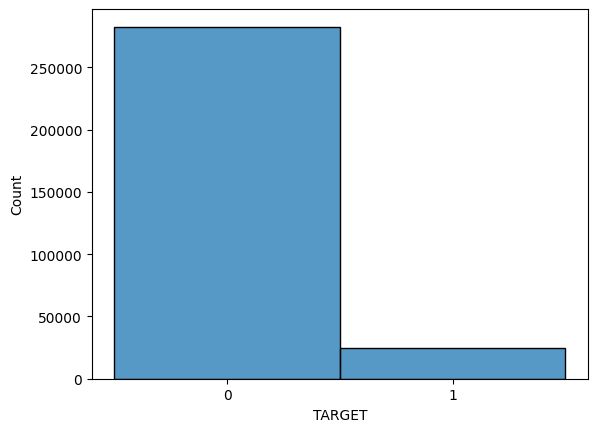

In [36]:
# target value distibution
ax = sns.histplot(data['TARGET'], kde=False)  # as distplot is a deprecated function
# set x-axis ticks only at unique values (0.0 and 1.0 - without ticks every 0.25)
unique_vals = sorted(data['TARGET'].dropna().unique())
ax.set_xticks(unique_vals)
plt.show()

In [37]:
# we can see that the target cateogical feature is imbalanced (too many 0 in comparison with 1)

### Visualize categorial features on histograms

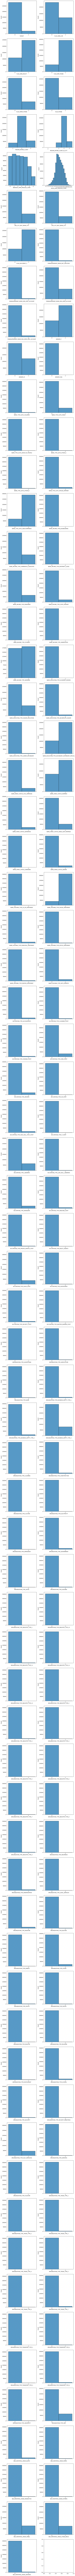

In [38]:
nrows = (len(categorical_features) + 1) // 2
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(10, 5 * nrows)  # adjust total height corresponding to number of rows (5 inches each row)

# flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.histplot(data[col], kde=False, ax=axes[i])
    
    # Set x-axis ticks only at unique values (0.0 and 1.0 - without ticks every 0.25)
    unique_vals = sorted(data[col].dropna().unique())
    axes[i].set_xticks(unique_vals)
    
    axes[i].tick_params(axis='x', rotation=90)  # Set rotation


plt.tight_layout()  # to prevent axis labels overlap
plt.show()

### Visualize numerical variables on histograms

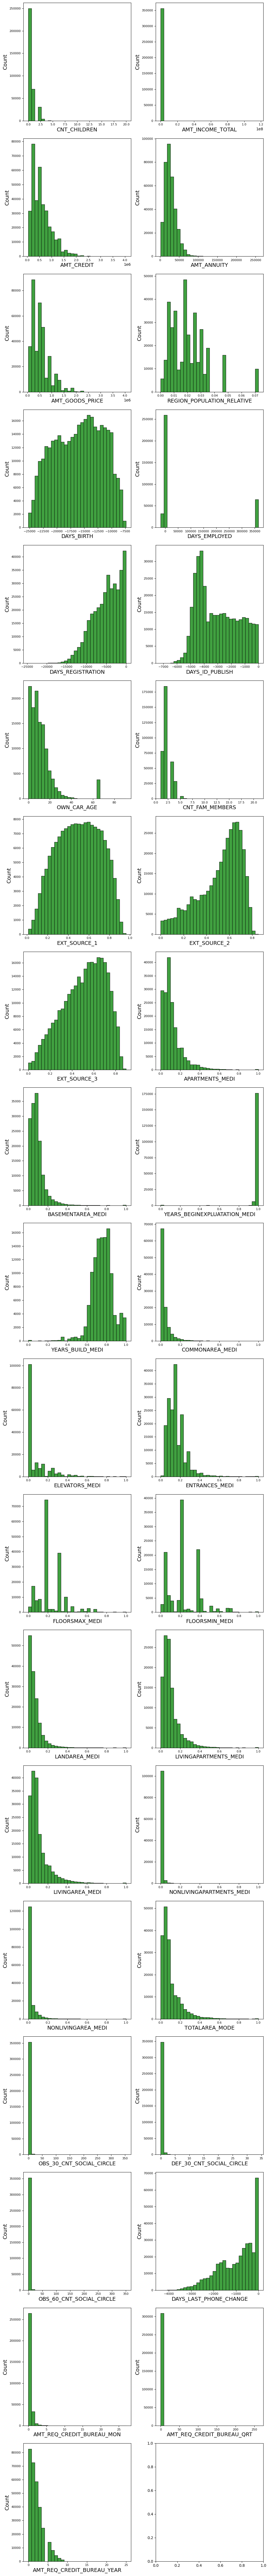

In [39]:
nrows = (len(numerical_features) + 1) // 2
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(data[col], ax=axes[i], color='g', bins=30)
    axes[i].tick_params(axis='both', labelsize=8)
    axes[i].set_xlabel(axes[i].get_xlabel(), fontsize=14)
    axes[i].set_ylabel(axes[i].get_ylabel(), fontsize=14)

plt.tight_layout()
plt.show()

In [40]:
data.median(numeric_only=True)

CNT_CHILDREN                         0.000000
AMT_INCOME_TOTAL                153000.000000
AMT_CREDIT                      500211.000000
AMT_ANNUITY                      25078.500000
AMT_GOODS_PRICE                 450000.000000
REGION_POPULATION_RELATIVE           0.018850
DAYS_BIRTH                      -15755.000000
DAYS_EMPLOYED                    -1224.000000
DAYS_REGISTRATION                -4502.000000
DAYS_ID_PUBLISH                  -3252.000000
OWN_CAR_AGE                          9.000000
CNT_FAM_MEMBERS                      2.000000
EXT_SOURCE_1                         0.506155
EXT_SOURCE_2                         0.564849
EXT_SOURCE_3                         0.533482
APARTMENTS_MEDI                      0.087400
BASEMENTAREA_MEDI                    0.076100
YEARS_BEGINEXPLUATATION_MEDI         0.981600
YEARS_BUILD_MEDI                     0.758500
COMMONAREA_MEDI                      0.021000
ELEVATORS_MEDI                       0.000000
ENTRANCES_MEDI                    

In [41]:
data.mean(numeric_only=True)

CNT_CHILDREN                         0.414316
AMT_INCOME_TOTAL                170116.059860
AMT_CREDIT                      587767.413753
AMT_ANNUITY                      27425.560657
AMT_GOODS_PRICE                 528019.997800
REGION_POPULATION_RELATIVE           0.020917
DAYS_BIRTH                      -16041.248841
DAYS_EMPLOYED                    64317.231413
DAYS_REGISTRATION                -4983.593527
DAYS_ID_PUBLISH                  -3002.071163
OWN_CAR_AGE                         12.023741
CNT_FAM_MEMBERS                      2.151858
EXT_SOURCE_1                         0.501965
EXT_SOURCE_2                         0.514890
EXT_SOURCE_3                         0.509350
APARTMENTS_MEDI                      0.118549
BASEMENTAREA_MEDI                    0.088178
YEARS_BEGINEXPLUATATION_MEDI         0.977903
YEARS_BUILD_MEDI                     0.755548
COMMONAREA_MEDI                      0.044994
ELEVATORS_MEDI                       0.078930
ENTRANCES_MEDI                    

### Boxplots/Outliners

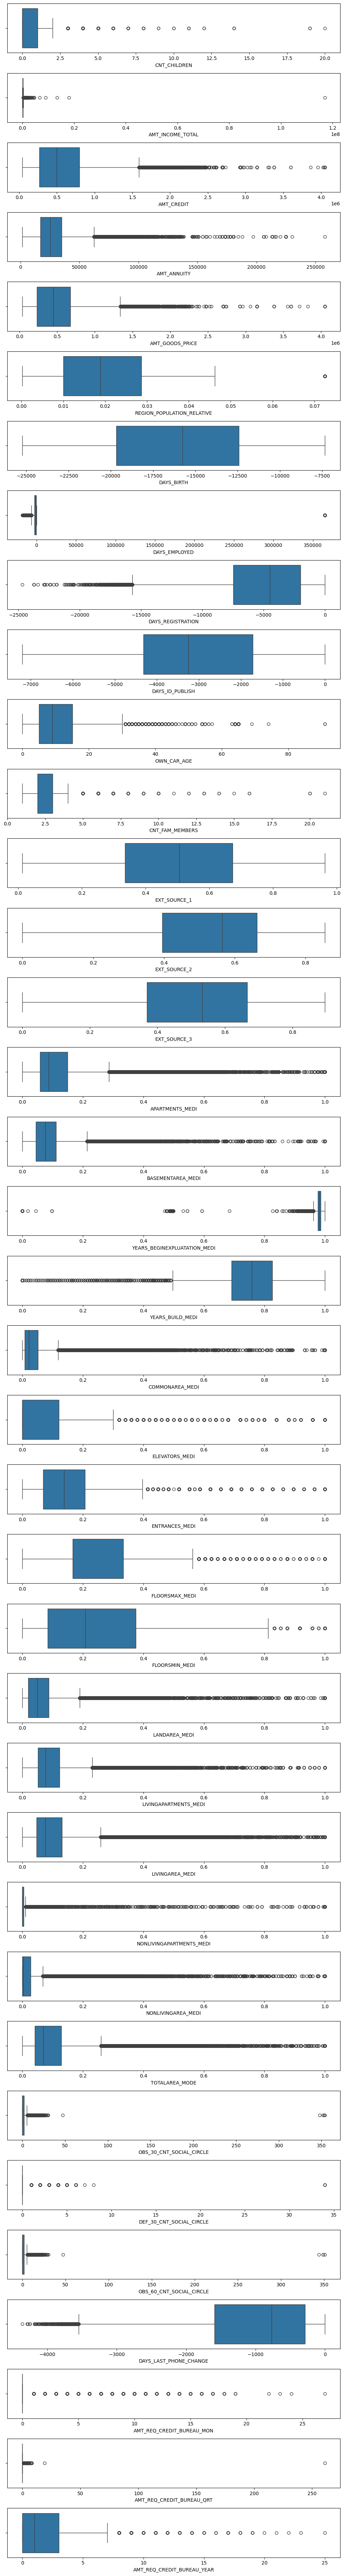

In [42]:
nrows = len(numerical_features)
ncols = 1

fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(10, 2 * nrows)

for i, col in enumerate(numerical_features):
    sns.boxplot(x=data[col], ax=axes[i])

plt.tight_layout()
plt.show()

In [43]:
# there are many outliners in data - black/gray circles
# we can't say if these outliners can be ignored
# all we can do - do experemnts with our without them and check the quality of model

In [44]:
# delete outliners and fill those cells with mean valu
# slightly affects accuracy in a bad way: without - 0.68 | with 0.67
# for col in numerical_features:
#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # set outliers to NaN
#     data[col] = data[col].where((data[col] >= lower_bound) & (data[col] <= upper_bound), np.nan)

#     # fill NaNs with mean (after outliers are removed)
#     mean_val = data[col].mean(skipna=True)
#     data[col].fillna(mean_val, inplace=True)

### Scaterplot

In [45]:
# sns.pairplot(data, hue='TARGET', size=5) # can't be processed - too long - freezes system 

## Corelation matrix

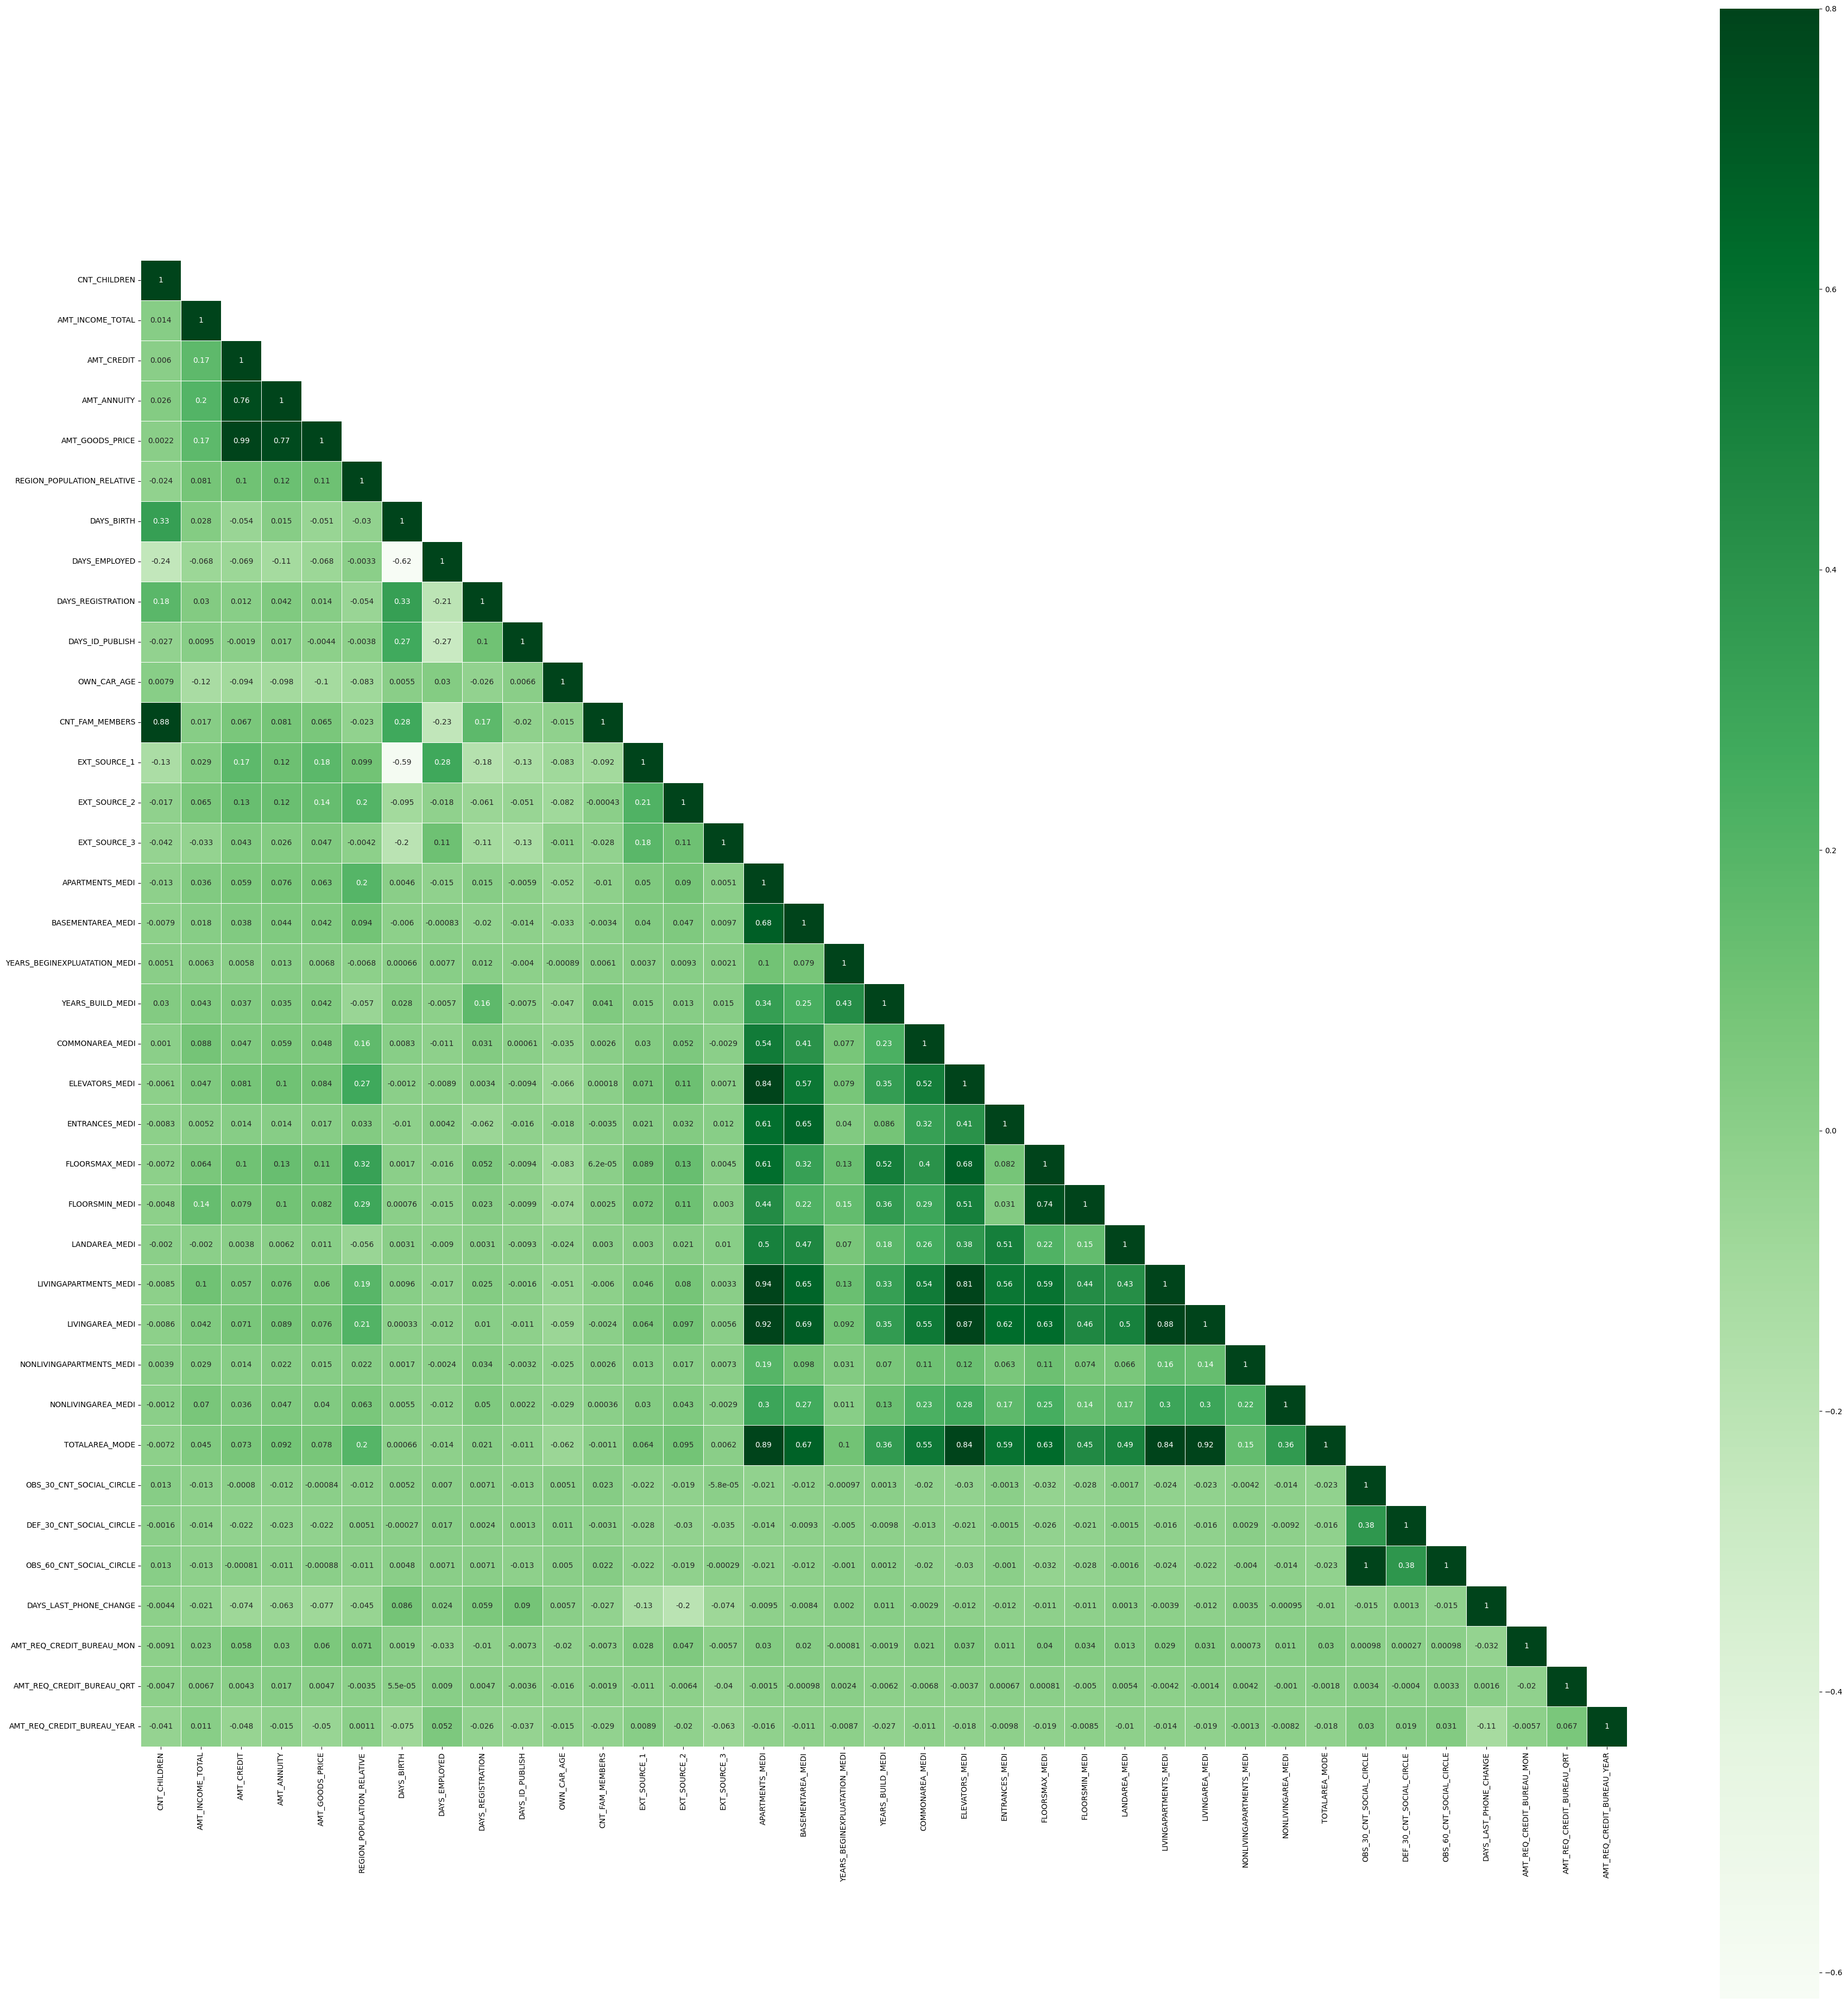

In [46]:
corrMatt = data.select_dtypes(include=[np.number]).corr()  # take only numerical values

# mask for upper triangle
# mask = np.array(corrMatt)
# mask[np.tril_indices_from(mask)] = False

# or delete upper triangle data completely (to avoid duplicates selecting high correlated pairs)
corrMatt.values[np.triu_indices_from(corrMatt, k=1)] = np.nan  # k = 1 to not to touch diag

# calculate number of features
num_vars = corrMatt.shape[0]

# set figure size to 1 inch per variable (width and height)
fig, ax = plt.subplots(figsize=(num_vars, num_vars))

# create heatmap
sns.heatmap(
    corrMatt,
    cmap='Greens',
    # mask=mask,  # don't need mask as upper triangle data deleted completely 
    vmax=.8,  # cap color greenity with 0.8
    square=True,
    annot=True,
    cbar=True,
    linewidths=0.5
)

plt.tight_layout()
plt.show()

In [47]:
high_corr = corrMatt.unstack()  # convert matr into series

# struct of series:

# Index (col1, col2)	            | Value (correlation)
# ----------------------------------+--------------------
# ('AMT_CREDIT', 'AMT_GOODS_PRICE')	| 0.987159
# ...                               | ...

high_corr = high_corr[high_corr < 1.0]  # remove self-correlations (where correlation = 1)

# uncomment if masking upper triangle (not deleting)
# high_corr.index = high_corr.index.map(lambda x: tuple(sorted(x))) # sort indexes so ('A', 'B') and ('B', 'A') become the same
# high_corr = high_corr[~high_corr.index.duplicated(keep='first')]  # drop duplicate pairs

high_corr = high_corr[high_corr > 0.8]  # filter for correlations greater than 0.8
high_corr


# if got squares with values close to 1 or -1 - means got values that corelate
# 0.98 - AMT_CREDIT : AMT_GOODS_PRICE
# 0.82 - APARTMENTS_MODE: ELEVATORS_MODE

CNT_CHILDREN              CNT_FAM_MEMBERS             0.878912
AMT_CREDIT                AMT_GOODS_PRICE             0.987159
APARTMENTS_MEDI           ELEVATORS_MEDI              0.837846
                          LIVINGAPARTMENTS_MEDI       0.942379
                          LIVINGAREA_MEDI             0.915138
                          TOTALAREA_MODE              0.885197
ELEVATORS_MEDI            LIVINGAPARTMENTS_MEDI       0.814598
                          LIVINGAREA_MEDI             0.868184
                          TOTALAREA_MODE              0.837669
LIVINGAPARTMENTS_MEDI     LIVINGAREA_MEDI             0.883826
                          TOTALAREA_MODE              0.844329
LIVINGAREA_MEDI           TOTALAREA_MODE              0.919219
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.998768
dtype: float64

In [48]:
# drop columns that highly correlate
data = data.drop(
        [   'CNT_CHILDREN',
            'AMT_CREDIT',
            'APARTMENTS_MEDI',
            'ELEVATORS_MEDI',
            'LIVINGAPARTMENTS_MEDI',
            'LIVINGAREA_MEDI',
            'OBS_30_CNT_SOCIAL_CIRCLE'
        ],
        axis=1         
    )

# update numerical_features after dropping correlated columns
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

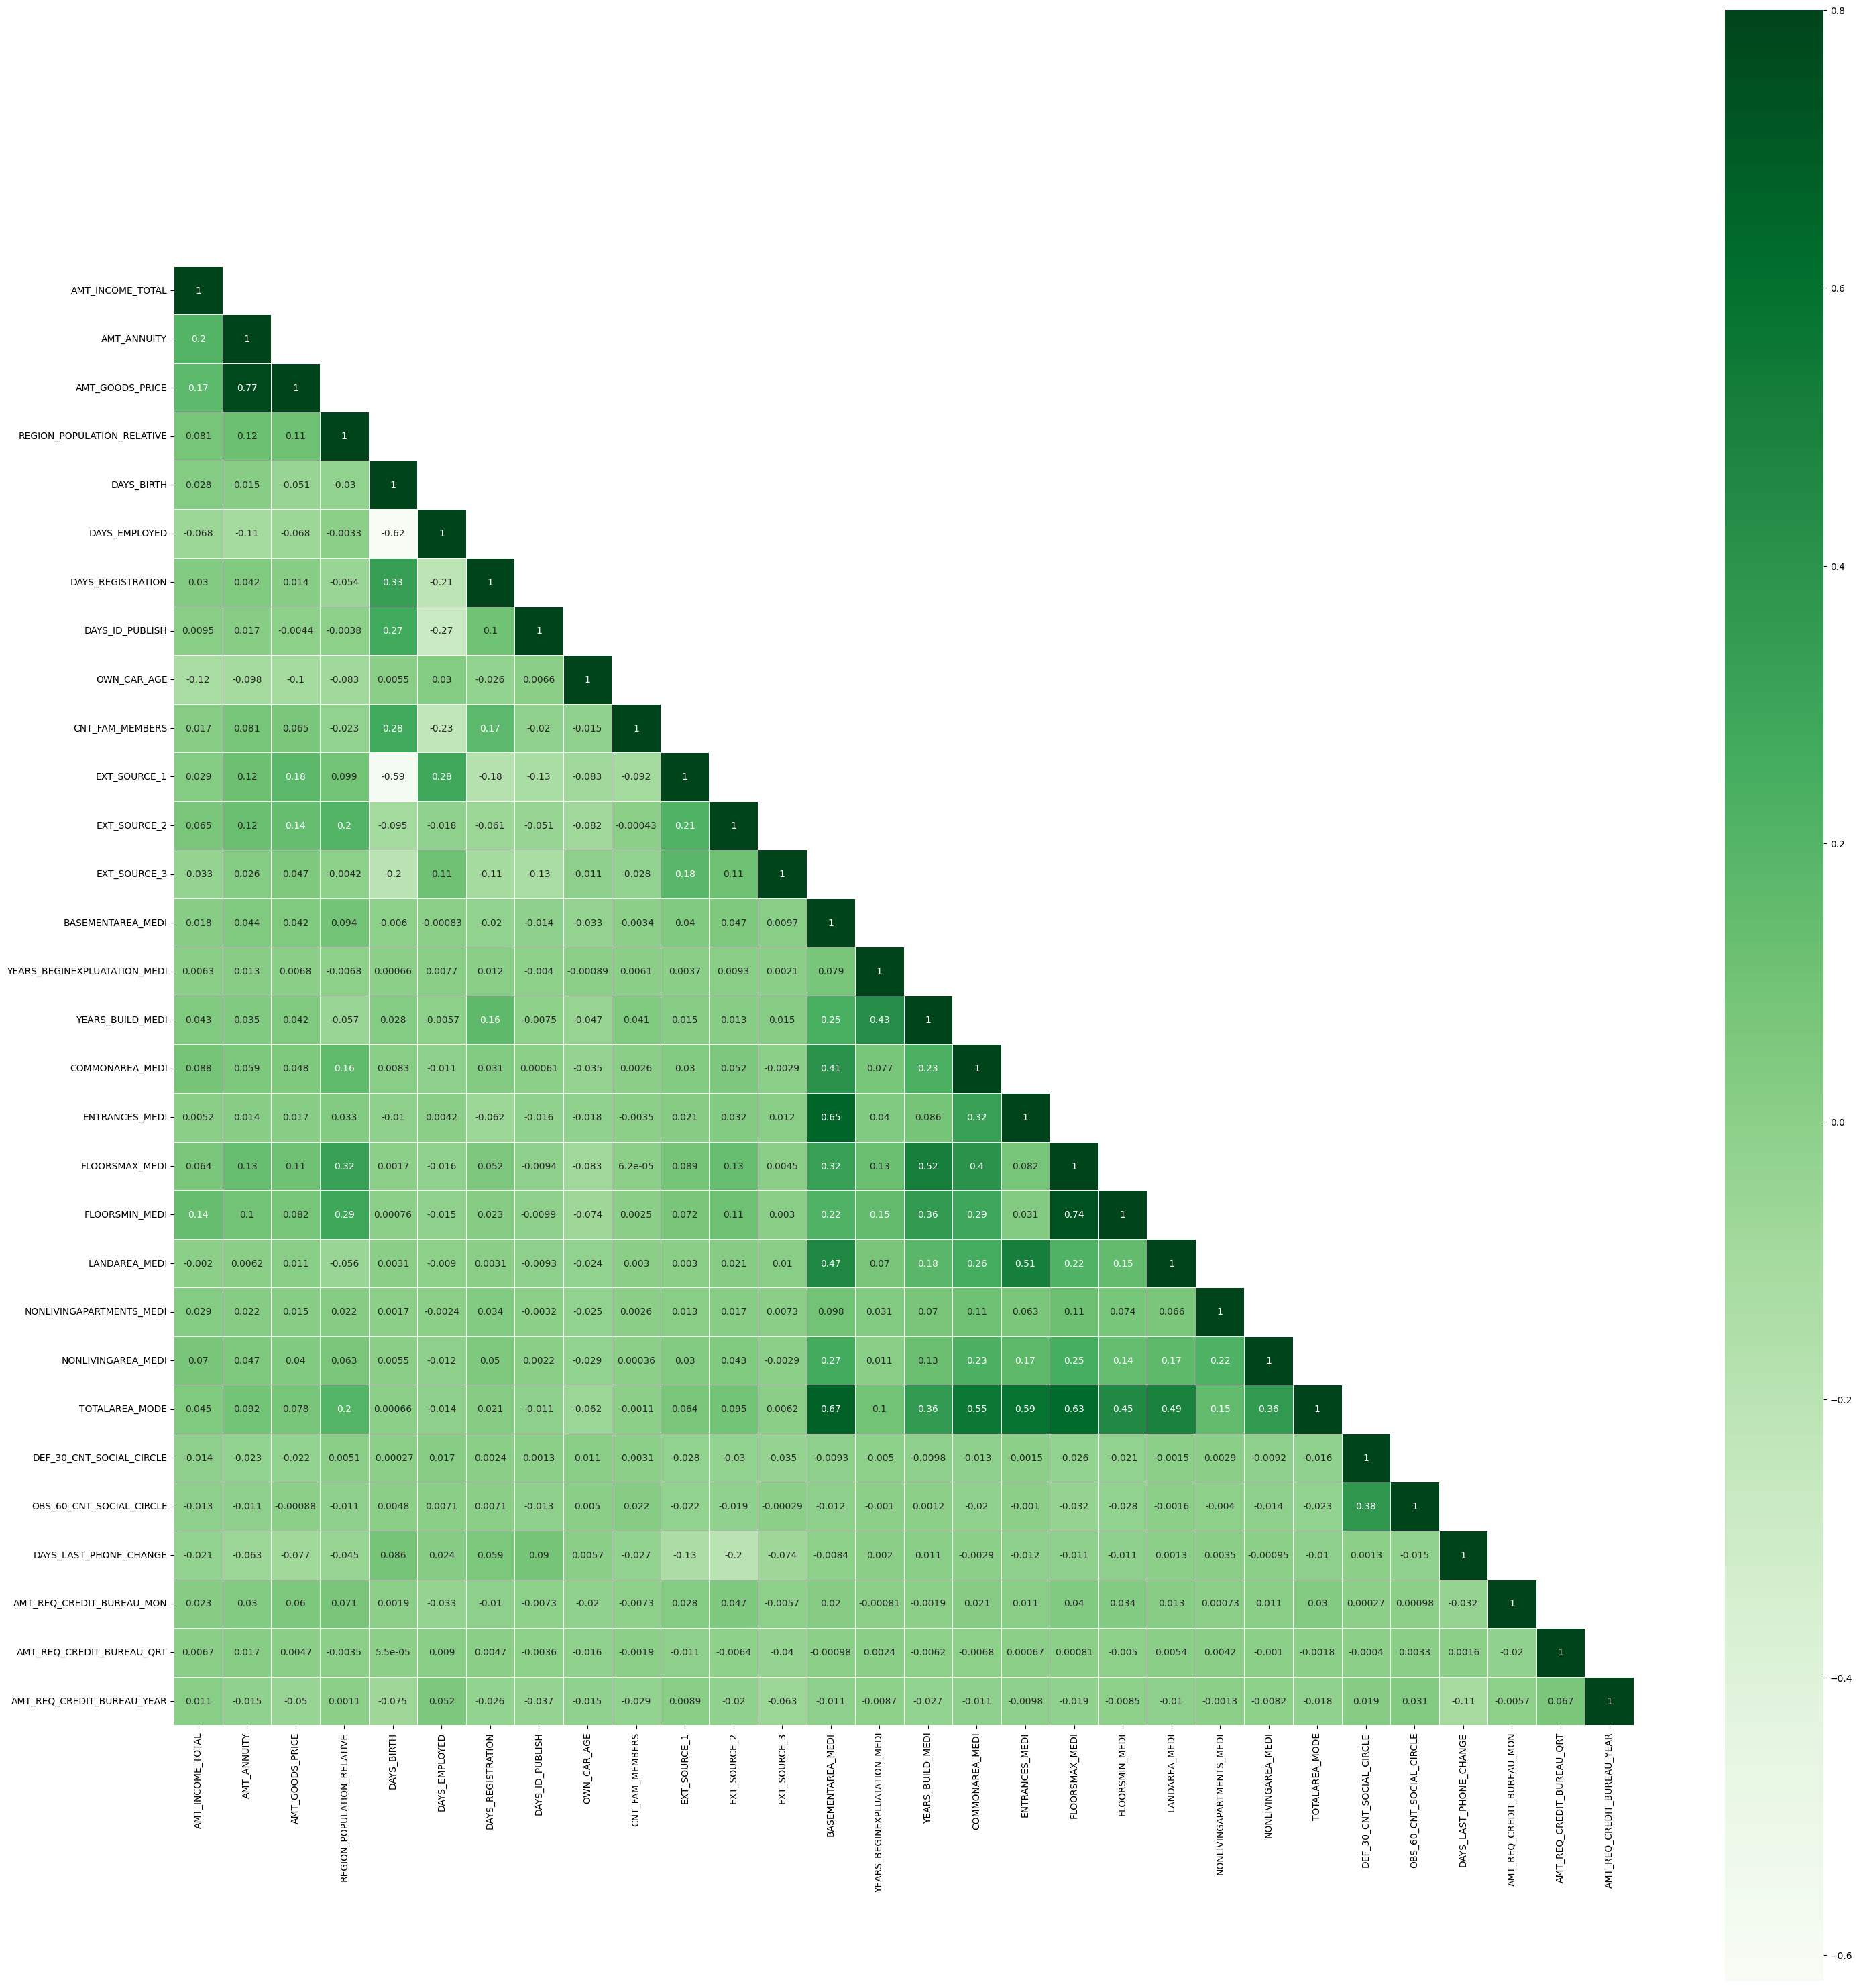

In [49]:
# show how correlation matrix changed
corrMatt = data.select_dtypes(include=[np.number]).corr()  # take only numerical values

# mask for upper triangle
# mask = np.array(corrMatt)
# mask[np.tril_indices_from(mask)] = False

# or delete upper triangle data completely (to avoid duplicates selecting high correlated pairs)
corrMatt.values[np.triu_indices_from(corrMatt, k=1)] = np.nan  # k = 1 to not to touch diag

# calculate number of features
num_vars = corrMatt.shape[0]

# set figure size to 1 inch per variable (width and height)
fig, ax = plt.subplots(figsize=(num_vars, num_vars))

# create heatmap
sns.heatmap(
    corrMatt,
    cmap='Greens',
    # mask=mask,  # don't need mask as upper triangle data deleted completely 
    vmax=.8,
    square=True,
    annot=True,
    cbar=True,
    linewidths=0.5
)

plt.tight_layout()
plt.show()

In [50]:
# now looks better - maximum correlation - 0.77

In [51]:
# separate train and test data
application_test_cleaned = data[data['TARGET'].isna()]  # rows where TARGET is NaN into separate dataframe | results into cleaned application_test
application_test_cleaned = application_test_cleaned.drop(columns=['TARGET'])  # drop empty column TARGET
application_train_cleaned = data.dropna(subset=['TARGET'])  # drop all rows where no target value | results into cleaned application_train

# convert numerical/categorical features lists into dataframes
numerical_features_df = pd.DataFrame(numerical_features, columns=['NUM_FEATURE'])  # still have NaNs
categorical_features_df = pd.DataFrame(categorical_features, columns=['CAT_FEATURE'])  # all categorial features were cleared from NaNs

# write data to a CSV files
numerical_features_df.to_csv('numerical_features.csv', index=False)  # index=False do not create autincrement row_id column
categorical_features_df.to_csv('categorical_features.csv', index=False)  # index=False do not create autincrement row_id column
application_test_cleaned.to_csv('application_test_cleaned.csv', index=False)  # index=False do not create autincrement row_id column
application_train_cleaned.to_csv('application_train_cleaned.csv', index=False)  # index=False do not create autincrement row_id column

## Scikit learn linear regression on numerical features only - build classifier

In [52]:
from sklearn.linear_model import LogisticRegression  # use linear regression as clasifier
from sklearn.model_selection import train_test_split  # to easy split data on train and test
from sklearn.preprocessing import StandardScaler  # to standartize features
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve  # to check accur. (rigth classified cases / total num of cases)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# load data
data = pd.read_csv('application_train_cleaned.csv')
data_no_target = pd.read_csv('application_test_cleaned.csv')  # doesn't have target column
numerical_features = pd.read_csv('numerical_features.csv')['NUM_FEATURE'].tolist()
categorical_features = pd.read_csv('categorical_features.csv')['CAT_FEATURE'].tolist()

In [54]:
# all categorial features were cleared from NaNs

# set mean for NaN values
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].mean())
data_no_target[numerical_features] = data_no_target[numerical_features].fillna(data_no_target[numerical_features].mean())

In [55]:
# check how many cells are empty
data.isnull().sum()

# can see that no NaN values left

TARGET                                             0
FLAG_OWN_CAR                                       0
FLAG_OWN_REALTY                                    0
AMT_INCOME_TOTAL                                   0
AMT_ANNUITY                                        0
AMT_GOODS_PRICE                                    0
REGION_POPULATION_RELATIVE                         0
DAYS_BIRTH                                         0
DAYS_EMPLOYED                                      0
DAYS_REGISTRATION                                  0
DAYS_ID_PUBLISH                                    0
OWN_CAR_AGE                                        0
FLAG_EMP_PHONE                                     0
FLAG_WORK_PHONE                                    0
FLAG_PHONE                                         0
CNT_FAM_MEMBERS                                    0
REGION_RATING_CLIENT                               0
REGION_RATING_CLIENT_W_CITY                        0
WEEKDAY_APPR_PROCESS_START                    

In [56]:
train_features = data.drop('TARGET', axis=1)  # delete TARGET from train features
categorical_features.remove('TARGET')  # also remove from col list
train_features.sample(5)  # do not print all - freezes system - too many rows 

FLAG_OWN_CAR  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_ANNUITY  \
220871             1                1           54000.0      15268.5   
213415             1                1          135000.0      32764.5   
72626              0                1          126000.0      13387.5   
31858              0                0          112500.0      22279.5   
22200              0                1           67500.0      16024.5   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
220871         238500.0                    0.007120      -16849   
213415         688500.0                    0.022800      -14890   
72626          225000.0                    0.009630      -15149   
31858          292500.0                    0.035792      -12629   
22200          351000.0                    0.015221      -19180   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
220871          -1804            -9061.0             -387     1.000000   
213415         365243            -5998.0            -5690     3.000000   
72626            -516            -1411.0             -316    12.061091   
31858           -1072            -2840.0            -4045    12.061091   
22200           -8989           -10149.0            -2709    12.061091   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE  CNT_FAM_MEMBERS  \
220871               1                0           0              1.0   
213415               0                0           0              2.0   
72626                1                0           0              3.0   
31858                1                0           0              2.0   
22200                1                1           1              2.0   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
220871                     2                            2   
213415                     2                            2   
72626                      2                            2   
31858                      2                            2   
22200                      2                            2   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
220871                           4                       10   
213415                           0                       12   
72626                            5                       12   
31858                            2                       11   
22200                            1                        9   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
220871                       1                        1      0.502130   
213415                       0                        0      0.356041   
72626                        0                        0      0.542138   
31858                        0                        0      0.160050   
22200                        0                        0      0.628374   

        EXT_SOURCE_2  EXT_SOURCE_3  BASEMENTAREA_MEDI  \
220871      0.296203      0.495666           0.087955   
213415      0.572974      0.475850           0.087955   
72626       0.563629      0.493863           0.087955   
31858       0.383651      0.443615           0.087955   
22200       0.285300      0.510853           0.087955   

        YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  \
220871                      0.977752          0.755746         0.044595   
213415                      0.977752          0.755746         0.044595   
72626                       0.977752          0.755746         0.044595   
31858                       0.977752          0.755746         0.044595   
22200                       0.974700          0.755746         0.044595   

        ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  \
220871        0.149213        0.225897        0.231625       0.067169   
213415        0.149213        0.225897        0.231625       0.067169   
72626         0.149213        0.225897        0.231625       0.067169   
31858         0.149213 

In [57]:
train_x, test_x, train_y, test_y = train_test_split(
    train_features,  # x: features/independent variables to split
    data['TARGET'],  # y: target/dependent variable to split
    test_size=0.2
)   
print(f'Train: {train_x.shape}, {train_y.shape}')
print(f'Test: {test_x.shape}, {test_y.shape}')

Train: (246008, 164), (246008,)
Test: (61503, 164), (61503,)


In [58]:
sc = StandardScaler()
scaled_train_x_numerical = sc.fit_transform(train_x[numerical_features])  # standartize train features for faster learning and better precision
# fit to learn some parametres from given data
scaled_train_x_numerical

array([[-1.00522511e-01, -2.48781108e-01, -3.36106744e-01, ...,
        -3.13792955e-01, -3.43114908e-01, -5.18366115e-01],
       [ 3.13795541e-01,  8.31976873e-01, -1.77789339e-01, ...,
        -3.13792955e-01,  9.47554902e-01,  6.33932021e-01],
       [ 1.39102248e+00,  7.21106011e-01,  1.26667207e-01, ...,
        -3.13792955e-01, -3.43114908e-01, -1.09451518e+00],
       ...,
       [-3.07681537e-01, -4.99715720e-01,  3.70232444e-01, ...,
        -3.13792955e-01, -3.43114908e-01, -1.09451518e+00],
       [ 1.34959067e+00,  2.04720848e+00,  2.25786303e+00, ...,
         7.16440978e-04, -4.75438116e-04,  1.53317210e-04],
       [-5.14840563e-01,  1.00527083e+00, -2.38680649e-01, ...,
        -3.13792955e-01, -3.43114908e-01,  5.77829531e-02]],
      shape=(246008, 30))

In [59]:
scaled_test_x_numerical = sc.transform(test_x[numerical_features])  # standartize train features for faster learning and better precision
# no fit to NOT to learn from data

In [60]:
# Extract categorical features (don't standardize them!)
train_x_categorical = train_x[categorical_features].values
test_x_categorical = test_x[categorical_features].values

In [61]:
# Combine scaled numerical + unchanged categorical features
train_x_combined = np.hstack([scaled_train_x_numerical, train_x_categorical])
test_x_combined = np.hstack([scaled_test_x_numerical, test_x_categorical])

In [62]:
lr = LogisticRegression(class_weight='balanced', max_iter=1000)  # balanced - adjusts the model to give more importance to the minority class during training | iter because withuot it stops on 100 iters
lr.fit(train_x_combined, train_y)  # can't train with data containing NaN 

LogisticRegression(class_weight='balanced', max_iter=1000)

In [63]:
train_preds = lr.predict(train_x_combined)
print(f'Train Accuracy: {accuracy_score(train_y, train_preds)}')

Train Accuracy: 0.6856118500211376


In [64]:
test_preds = lr.predict(test_x_combined)
print(f'Test Accuracy: {accuracy_score(test_y, test_preds)}')

Test Accuracy: 0.686616912996114


In [65]:
# Get probability predictions for ROC-AUC
# lr.predict_proba(scaled_train_x) returns a 2D array with shape (n, 2):
# first column contains probability of target to be class 0 (negative)
# second column contains probability of target to be class 1 (positive)
train_probs = lr.predict_proba(train_x_combined)[:, 1]  # probabilities for positive class
test_probs = lr.predict_proba(test_x_combined)[:, 1]   # select all rows from second column

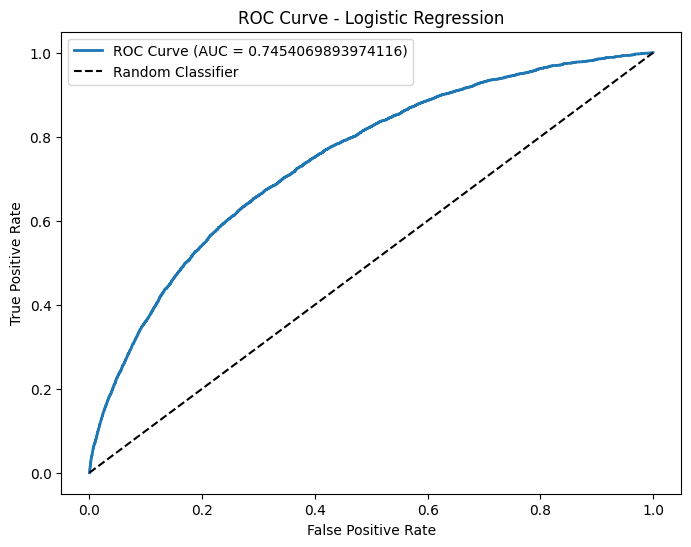

In [66]:
# Plot ROC curve - (Receiver Operating Characteristic )
fpr, tpr, thresholds = roc_curve(test_y, test_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(test_y, test_probs)})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
# plt.grid(True, alpha=0.3)
plt.show()

In [67]:
# Find optimal threshold (maximizes True Positive Rate - False Positive Rate)
optimal_idx = np.argmax(tpr - fpr)  # find where diff between True Positive Rate and False Positive Rate is the biggest - Youden's Index
optimal_threshold = thresholds[optimal_idx]  # take value by thay index from all thresholds list roc_curve() provided

# apply threshold for initial probs
# compare each value of initial test_prob to found optimal_test_prob
# get array of true or false
# cast bool into int
test_preds_optimal = (test_probs >= optimal_threshold).astype(int)  

In [68]:
# test accuracy with different thresholds

print(f'Test Accuracy with optimal threshold ({optimal_threshold}): {accuracy_score(test_y, test_preds_optimal):.4f}')
print(f'Test Accuracy with 0.5 threshold: {accuracy_score(test_y, test_preds):.4f}')

Test Accuracy with optimal threshold (0.5135215891354652): 0.7043
Test Accuracy with 0.5 threshold: 0.6866


In [69]:
# Probability Distribution of Classes plot - to see if optimal threshold is right

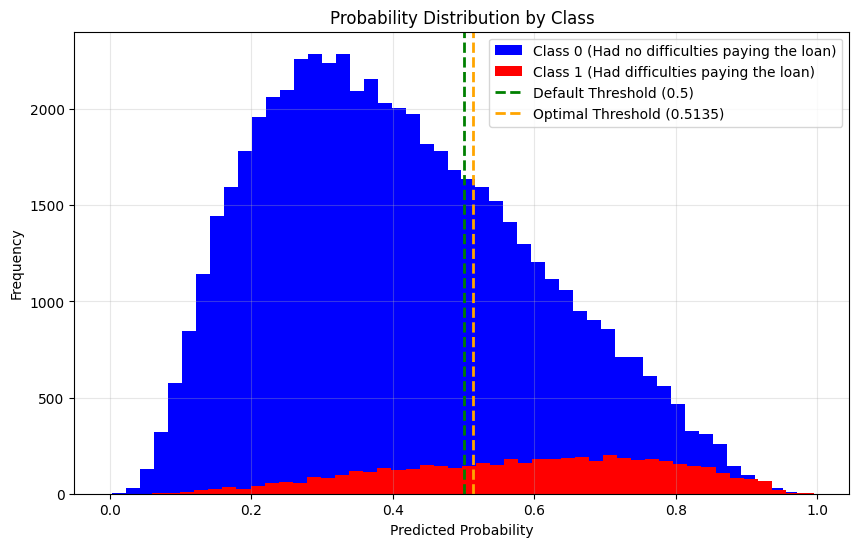

In [70]:
# showing absolute values

plt.figure(figsize=(10, 6))
plt.hist(test_probs[test_y == 0], bins=50, label='Class 0 (Had no difficulties paying the loan)', color='blue')
plt.hist(test_probs[test_y == 1], bins=50, label='Class 1 (Had difficulties paying the loan)', color='red')

# threshold lines
plt.axvline(x=0.5, color='green', linestyle='--', linewidth=2, label='Default Threshold (0.5)')
plt.axvline(x=optimal_threshold, color='orange', linestyle='--', linewidth=2, label=f'Optimal Threshold ({optimal_threshold:.4f})')

# labels and title
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Probability Distribution by Class')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

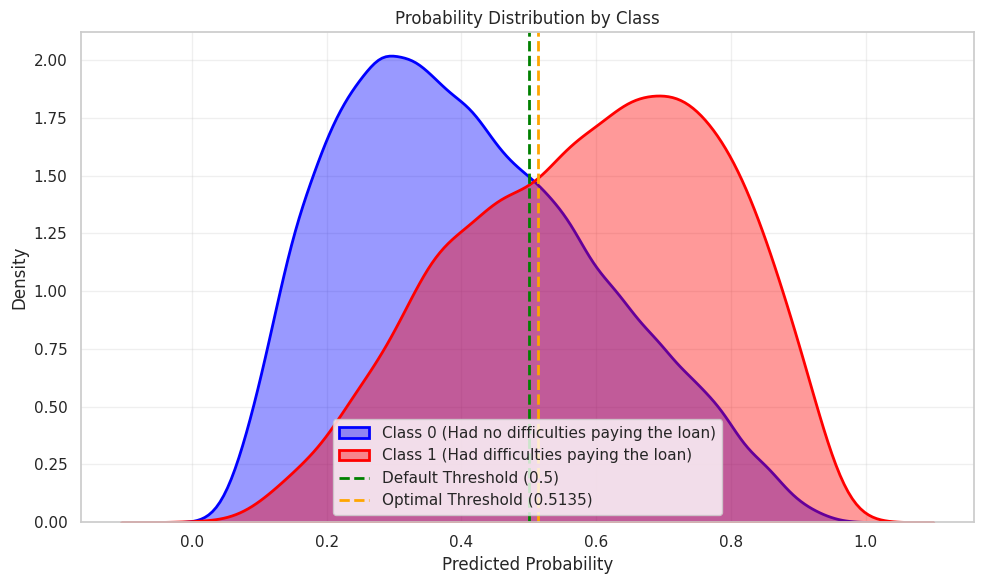

In [71]:
# showing probability density

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  # create the KDE plot - probability density

# create the KDE plot - probability density
sns.kdeplot(test_probs[test_y == 0], label='Class 0 (Had no difficulties paying the loan)', color='blue', linewidth=2, fill=True, alpha=0.4)
sns.kdeplot(test_probs[test_y == 1], label='Class 1 (Had difficulties paying the loan)', color='red', linewidth=2, fill=True, alpha=0.4)

# threshold lines
plt.axvline(x=0.5, color='green', linestyle='--', linewidth=2, label='Default Threshold (0.5)')
plt.axvline(x=optimal_threshold, color='orange', linestyle='--', linewidth=2, label=f'Optimal Threshold ({optimal_threshold:.4f})')

# labels and title
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Probability Distribution by Class')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Without balanced in lr = LogisticRegression(class_weight='balanced', max_iter=1000)
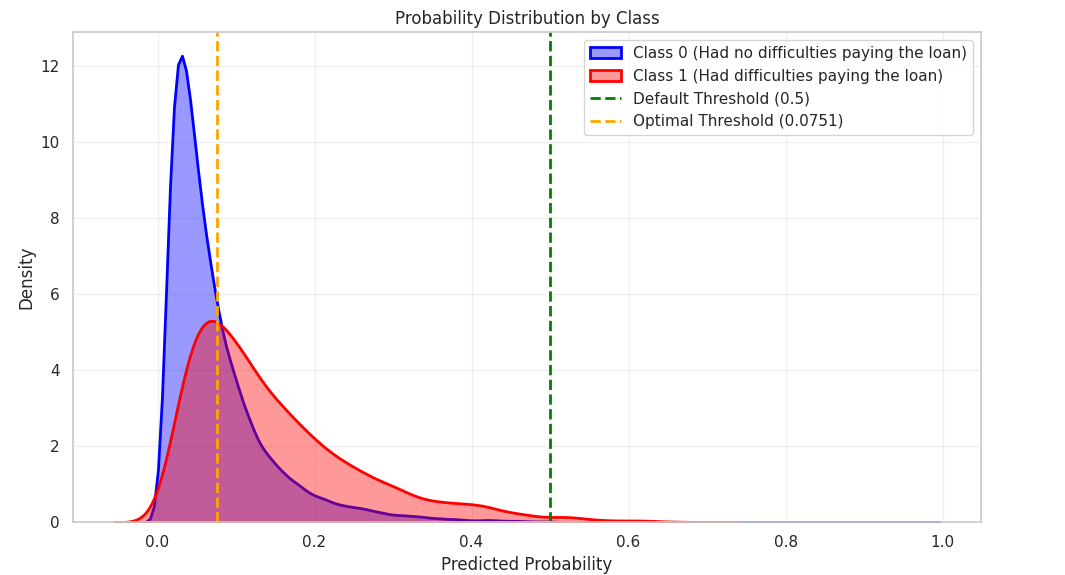

In [72]:
# as we can see on the first cells dataset is very unbalanced - most TARGET are zeros

# With 0.5 threshold (Accuracy = 91.75%)
# - the model predicts most cases as negative (class 0)
# - since most cases ARE actually negative, we get high accuracy

# With optimal threshold (Accuracy = 68.68%)
# - model predicts MORE cases as positive
# - catch more actual trues (higher TPR/FPR)
# - overall accuracy drops because of misclassifying more of the abundant negative cases

In [73]:
print(f'Intercept: {lr.intercept_}')  # bias
all_features = numerical_features + categorical_features
for feature_name, coef in zip(all_features, lr.coef_[0]):  # showing weights
    print(f'{feature_name}: {coef}')

Intercept: [-1.23542734]
AMT_INCOME_TOTAL: -0.024146817441148157
AMT_ANNUITY: 0.148706808254741
AMT_GOODS_PRICE: -0.08612919961898209
REGION_POPULATION_RELATIVE: 0.019237916439212008
DAYS_BIRTH: 0.001431885825581949
DAYS_EMPLOYED: 5.106337929616206
DAYS_REGISTRATION: 0.030188994852663475
DAYS_ID_PUBLISH: 0.0677493917002866
OWN_CAR_AGE: 0.045180987119940196
CNT_FAM_MEMBERS: 0.02657839082815128
EXT_SOURCE_1: -0.1826661584894967
EXT_SOURCE_2: -0.3922723636343733
EXT_SOURCE_3: -0.48892375059608395
BASEMENTAREA_MEDI: 0.008420518075018557
YEARS_BEGINEXPLUATATION_MEDI: -0.009479649946067236
YEARS_BUILD_MEDI: -0.014965041218046095
COMMONAREA_MEDI: 0.004761035383055975
ENTRANCES_MEDI: -0.024383279427644934
FLOORSMAX_MEDI: -0.02947436656108358
FLOORSMIN_MEDI: 0.003656336099350924
LANDAREA_MEDI: -0.0003243756555104107
NONLIVINGAPARTMENTS_MEDI: 0.016732108434687067
NONLIVINGAREA_MEDI: -0.02783563666574358
TOTALAREA_MODE: 0.015556067341247258
DEF_30_CNT_SOCIAL_CIRCLE: 0.07630335087399016
OBS_60_CNT

## Classify test data

In [76]:
# Scale the features using the same scaler
scaled_predict_x_numerical = sc.transform(data_no_target[numerical_features])
# Extract categorical features (unchanged)
predict_x_categorical = data_no_target[categorical_features].values
# Combine scaled numerical + unchanged categorical
predict_x_combined = np.hstack([scaled_predict_x_numerical, predict_x_categorical])
# Get probability predictions
predict_probs = lr.predict_proba(predict_x_combined)[:, 1]
# Apply optimal threshold
predict_labels = (predict_probs >= optimal_threshold).astype(int)
# Read original test data again | Load only the SK_ID_CURR column
final_test_data = pd.read_csv('application_test.csv', usecols=['SK_ID_CURR'])
# Add predictions back to the dataframe
final_test_data['TARGET'] = predict_labels

In [77]:
# write the final_test_data DataFrame to a CSV file
final_test_data.to_csv('output.csv', index=False)  # index=False do not create autincrement row_id column

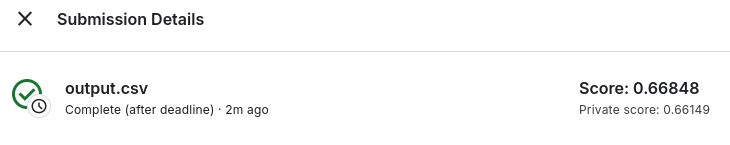

In [ ]:
# can see that accuracy comes close to accuracy we got testing our model before